# **Plotting Residuals for '*SpalartAllmaras*' Model**

This notebook explains how to plot residuals as time increases for two cases (Turbulent flat plate case with and without wall functions). The procedure is identical to '*PlotCf.ipynb*', but only the turbulence model is different. Here, '*SpalartAllmaras*' model is used, whereas '*kOmegaSST*' model is employed in '*PlotCf.ipynb*'. First of all, related setups are to be established as follows.

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"
sa = "./output/SA/"
!mkdir -p output
!mkdir -p output/SA

## **1. Set Related Variables in Accordance with the Case Data**

In order to simulate the case for various conditions, we need to set related variables (e.g. model name, yplus, and residual limits). Particularly, *'yp'* and *'res_list'* should be lists, and therefore we can delineate all the related graph in one jupyter notebook. The list *'res_list'* contains all the different limit residuals for **SIMPLE** residual control.

In [2]:
model = "SpalartAllmaras"
yp = ['0.05', '1', '2', '5', '10', '30', '50', '100']
res_list = ['1e-3', '1e-4', '1e-5', '1e-6']

## **2. Load Data**
\*.*csv* files that were created during simulation are loaded to python. For this case, we need to calculate with various residual limits and yp values, and hence *'solverInfo_path'* should be a list that contains each residual limit value for each yp. In addition, *'.head()'* is used for checking top 5 rows and all columns are well divided.

### 2-1. Turbulent Flat Plate Case with Wall Functions

In [3]:
solverInfo_path = [run + 'turbulentFlatPlate_SA/yplus_{}/solverInfo_{}_{}_{}.csv'.format(yp[j], model, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data = [pd.read_csv(solverInfo_path[i + len(res_list)*j], delim_whitespace=True, skiprows = 1) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data[0].head()

Time      U_solver  Ux_initial  Ux_final  Ux_iters  Uy_initial  Uy_final  \
0     1  smoothSolver    1.000000  0.068449         3    1.000000  0.068991   
1     2  smoothSolver    0.174039  0.013639         3    0.152616  0.013808   
2     3  smoothSolver    0.056968  0.005517         4    0.086929  0.005810   
3     4  smoothSolver    0.033010  0.002713         5    0.055212  0.005426   
4     5  smoothSolver    0.023738  0.002235         5    0.043987  0.004261   

   Uy_iters  U_converged p_solver  p_initial   p_final  p_iters  p_converged  
0         2        False     GAMG   1.000000  0.098800       12         True  
1         2        False     GAMG   0.002981  0.000248        5         True  
2         3        False     GAMG   0.004910  0.000375        5         True  
3         2        False     GAMG   0.006636  0.000483        3         True  
4         2        False     GAMG   0.007017  0.000490        4         True

### 2-2. Turbulent Flat Plate Case without Wall Functions

In [4]:
solverInfo_path_noWallFunc = [run + 'turbulentFlatPlate_SA_noWallFunc/yplus_{}/solverInfo_{}_{}_{}.csv'.format(yp[j], model, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data_noWallFunc = [pd.read_csv(solverInfo_path_noWallFunc[i + len(res_list)*j], delim_whitespace=True, skiprows = 1) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data_noWallFunc[0].head()

Time      U_solver  Ux_initial  Ux_final  Ux_iters  Uy_initial  Uy_final  \
0     1  smoothSolver    1.000000  0.068462         3    1.000000  0.069000   
1     2  smoothSolver    0.174062  0.013640         3    0.152616  0.013808   
2     3  smoothSolver    0.056973  0.005517         4    0.086931  0.005810   
3     4  smoothSolver    0.033011  0.002713         5    0.055214  0.005426   
4     5  smoothSolver    0.023739  0.002235         5    0.043988  0.004261   

   Uy_iters  U_converged p_solver  p_initial   p_final  p_iters  p_converged  
0         2        False     GAMG   1.000000  0.098800       12         True  
1         2        False     GAMG   0.002981  0.000248        5         True  
2         3        False     GAMG   0.004909  0.000375        5         True  
3         2        False     GAMG   0.006636  0.000483        3         True  
4         2        False     GAMG   0.007016  0.000490        4         True

## **3. Import of Initial Residual for *'U<sub>x</sub>'*, *'U<sub>y</sub>'*, and *'p'***

In \*.*csv* files of *'solverInfo'*, all the residuals for *'U<sub>x</sub>'*, *'U<sub>y</sub>'*, and *'p'* are already calculated. Therefore, these values need to be imported to python. All the values should be lists as they are calculated for various **SIMPLE** residual limits.

### 3-1. Turbulent Flat Plate Case with Wall Functions

In [5]:
Ux_init_res = [solverInfo_data[i + len(res_list)*j]['Ux_initial'] for j in range(len(yp)) for i in range(len(res_list))]
Uy_init_res = [solverInfo_data[i + len(res_list)*j]['Uy_initial'] for j in range(len(yp)) for i in range(len(res_list))]
p_init_res = [solverInfo_data[i + len(res_list)*j]['p_initial'] for j in range(len(yp)) for i in range(len(res_list))]
t = [solverInfo_data[i + len(res_list)*j]['Time'] for j in range(len(yp)) for i in range(len(res_list))]

### 3-2. Turbulent Flat Plate Case without Wall Functions

In [6]:
Ux_init_res_noWallFunc = [solverInfo_data_noWallFunc[i + len(res_list)*j]['Ux_initial'] for j in range(len(yp)) for i in range(len(res_list))]
Uy_init_res_noWallFunc = [solverInfo_data_noWallFunc[i + len(res_list)*j]['Uy_initial'] for j in range(len(yp)) for i in range(len(res_list))]
p_init_res_noWallFunc = [solverInfo_data_noWallFunc[i + len(res_list)*j]['p_initial'] for j in range(len(yp)) for i in range(len(res_list))]
t_noWallFunc = [solverInfo_data_noWallFunc[i + len(res_list)*j]['Time'] for j in range(len(yp)) for i in range(len(res_list))]

## **4. Plot**

All the initial residuals are plotted as the time step increases. Since observing of convergence behavior is the purpose of this notebook, it would be better that graphs are separated by each **SIMPLE** residual limits, unlike plotting skin friction.

### 4-1. Turbulent Flat Plate Case with Wall Functions

<ipython-input-7-7d9338b8c7b5>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(8, 3))


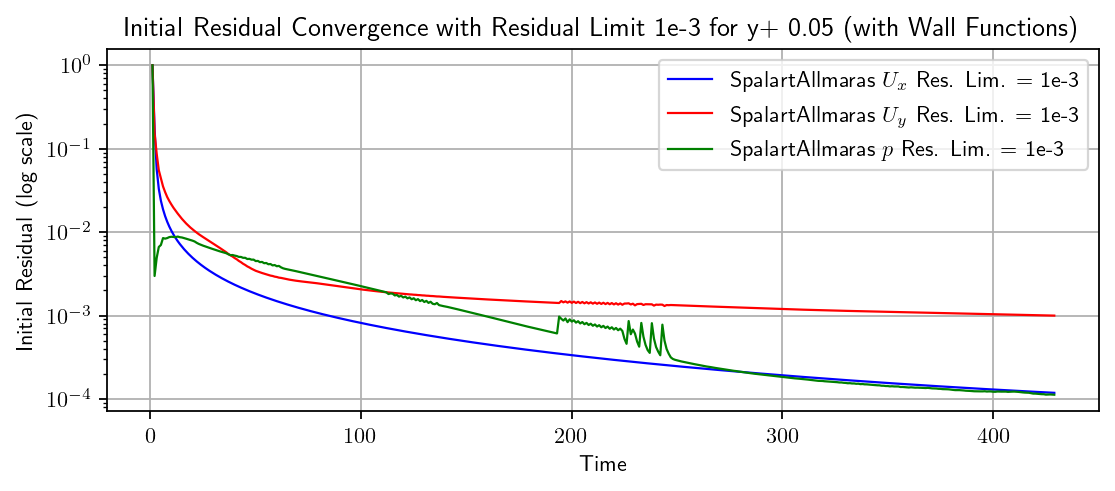

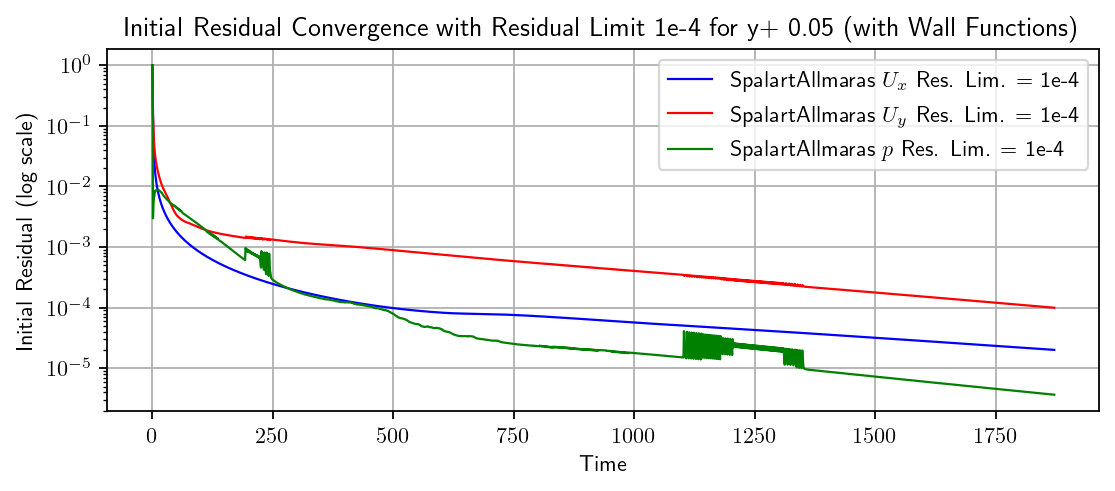

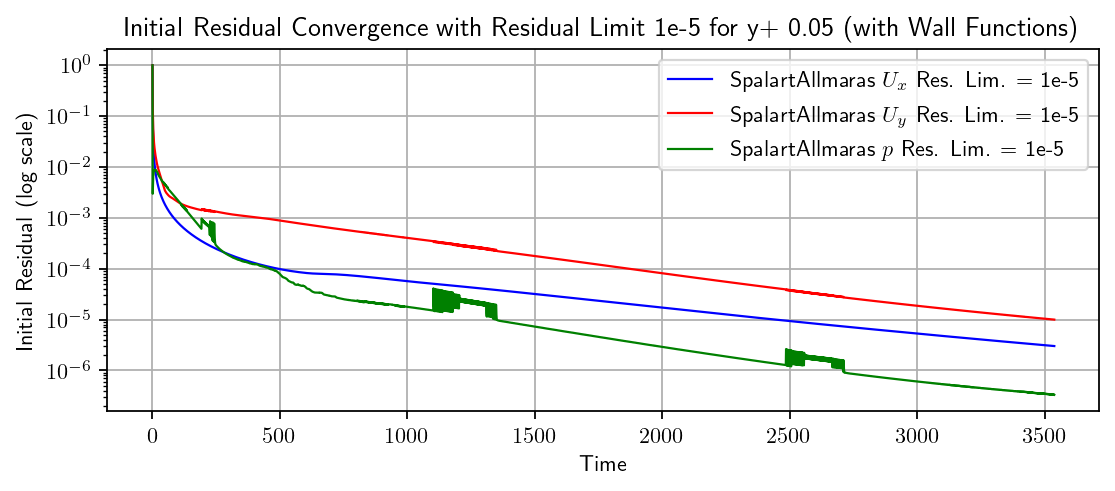

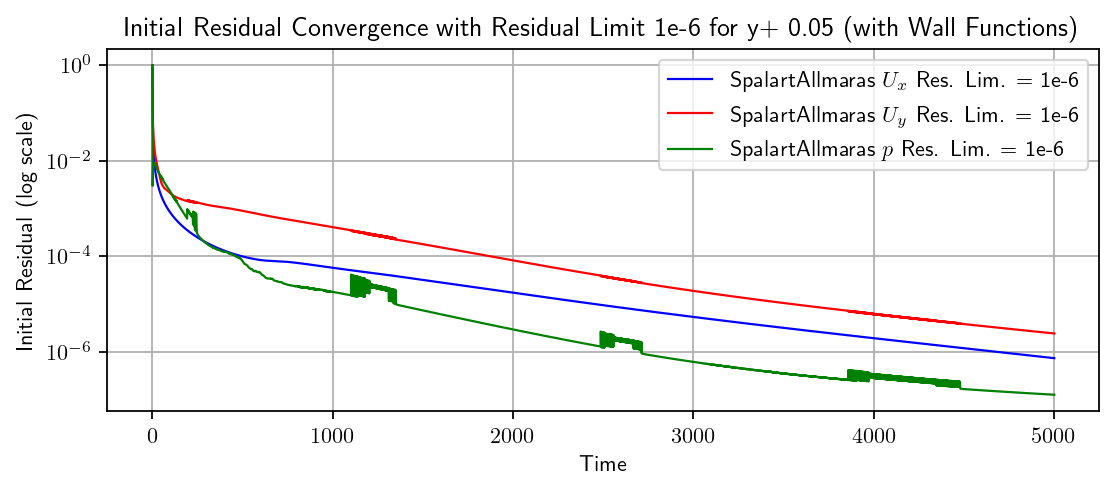

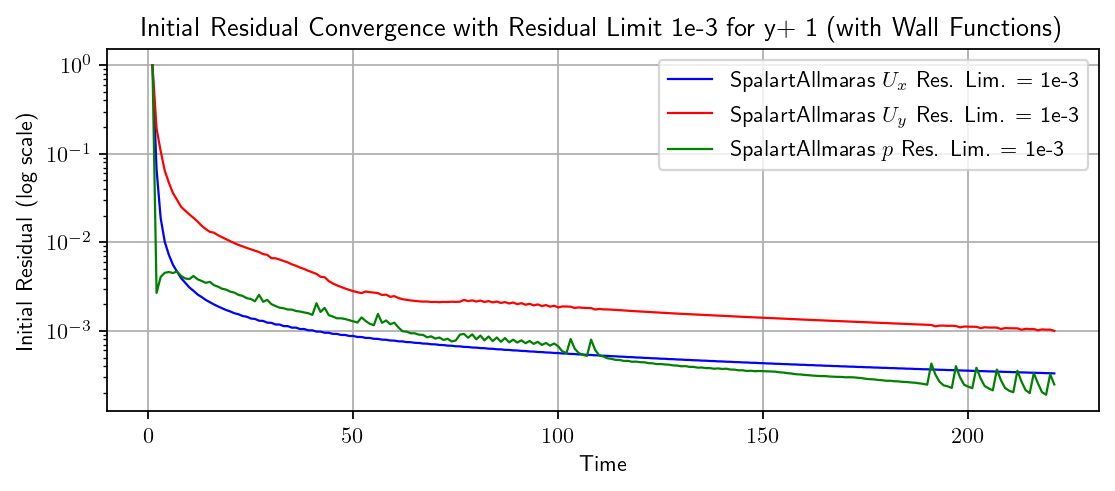

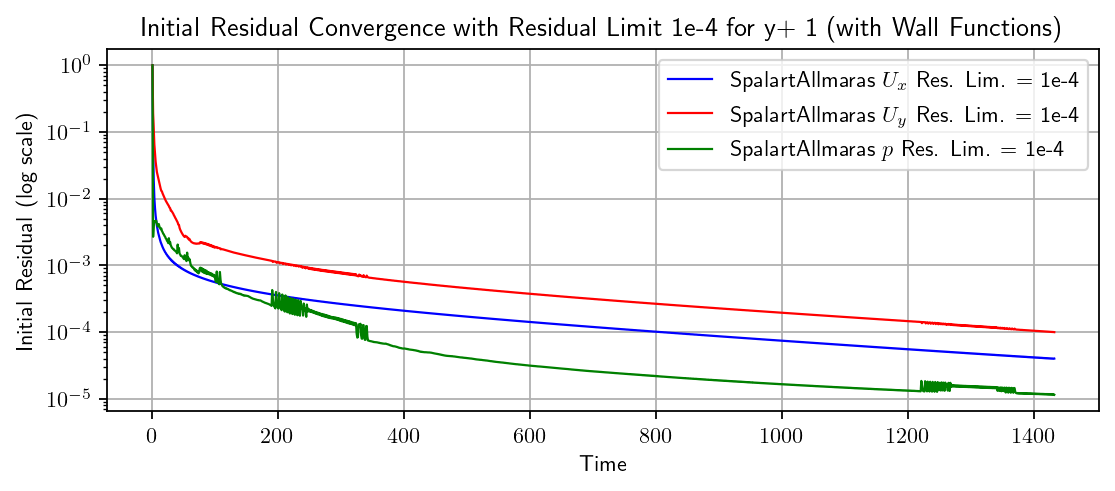

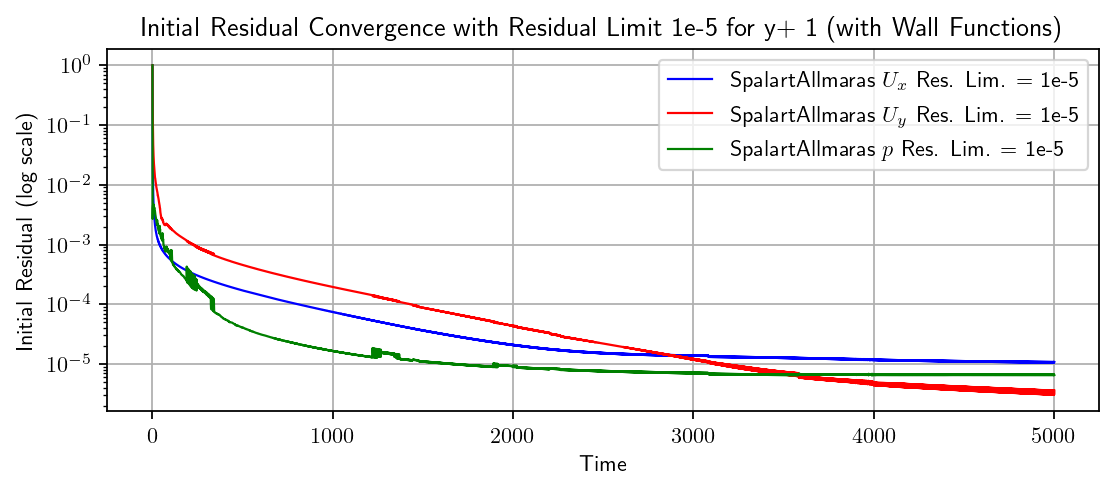

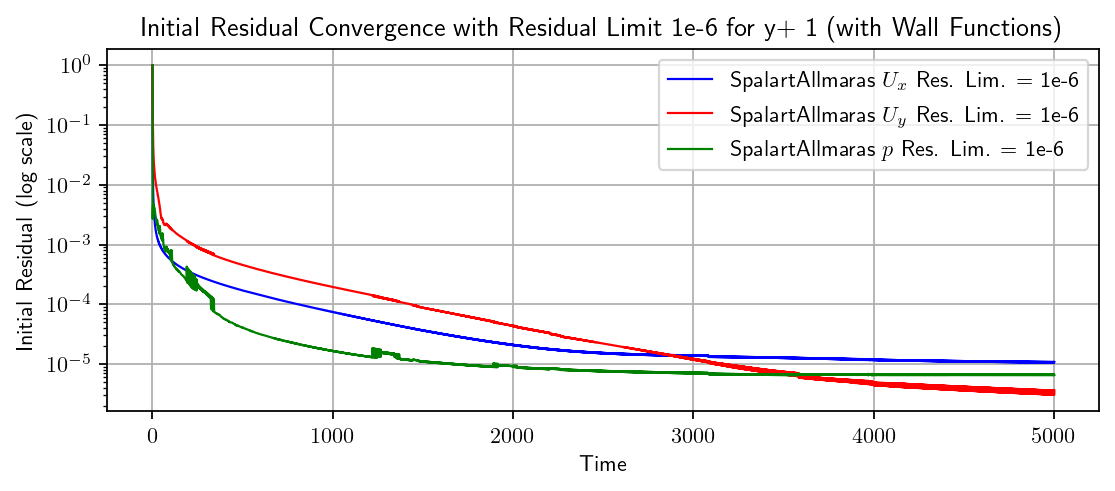

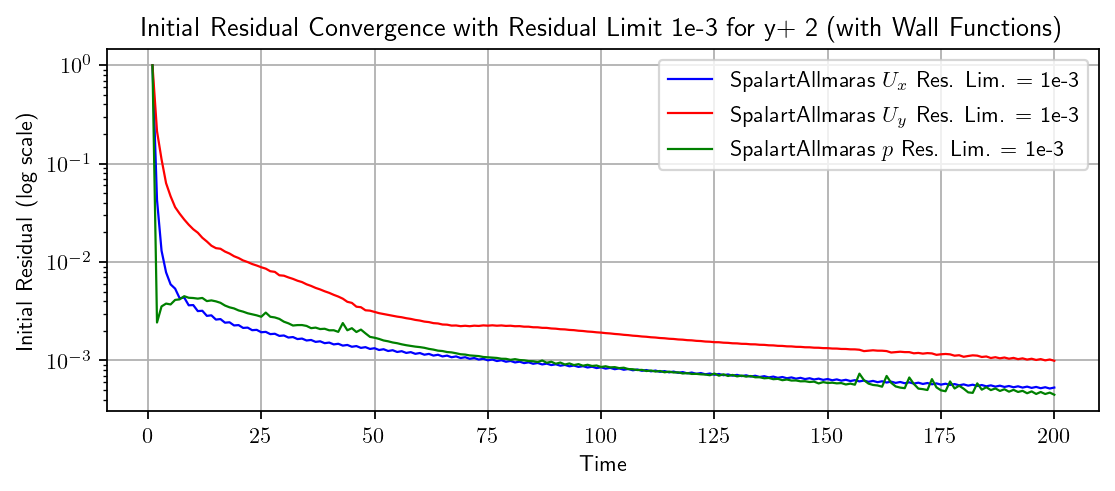

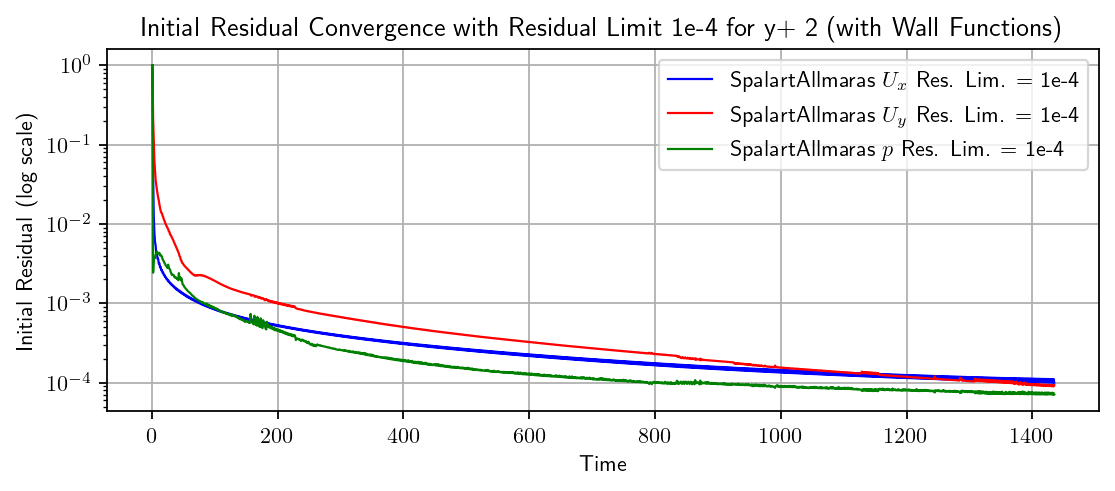

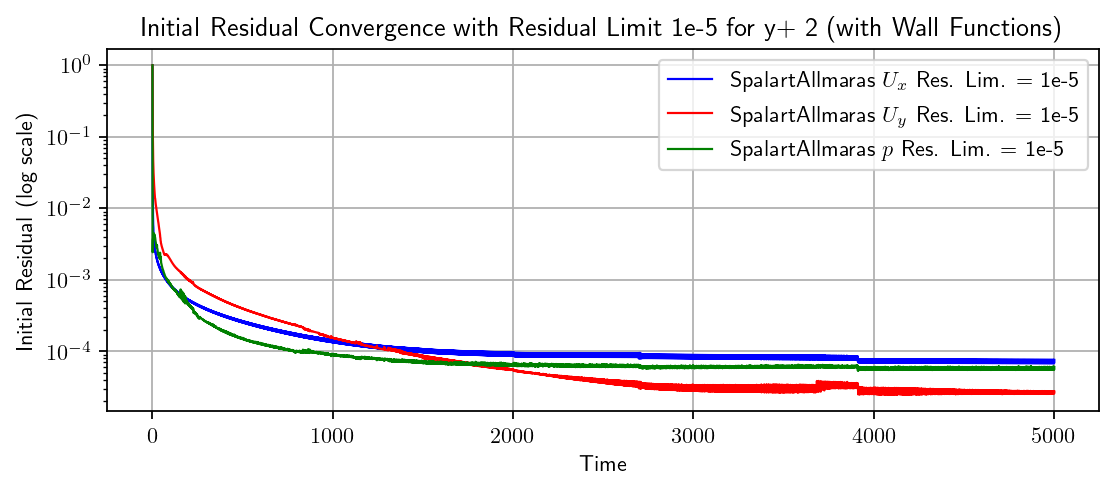

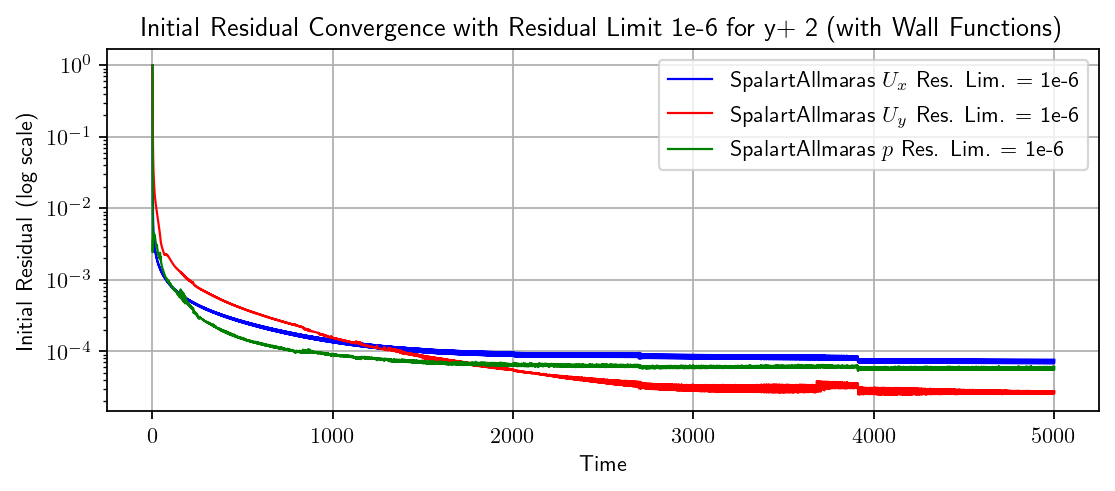

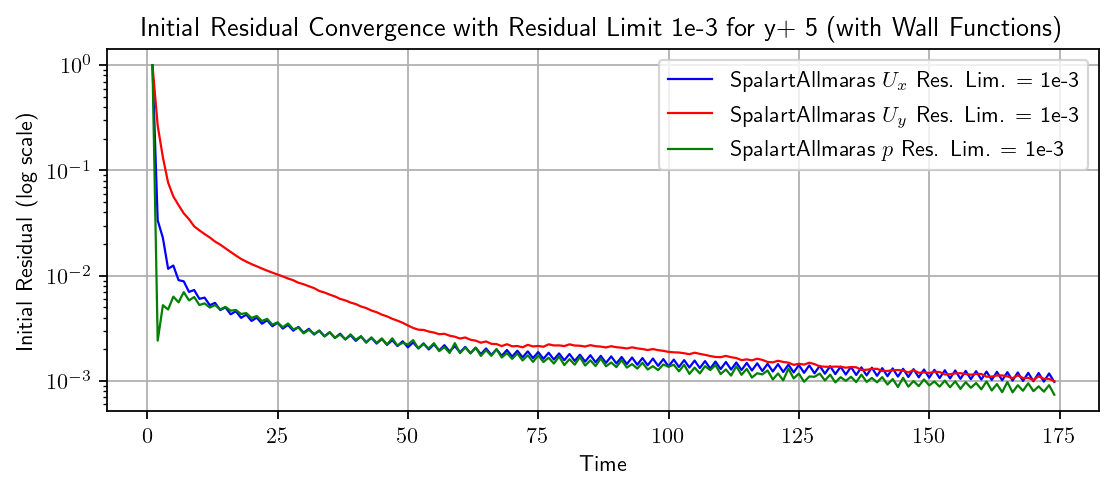

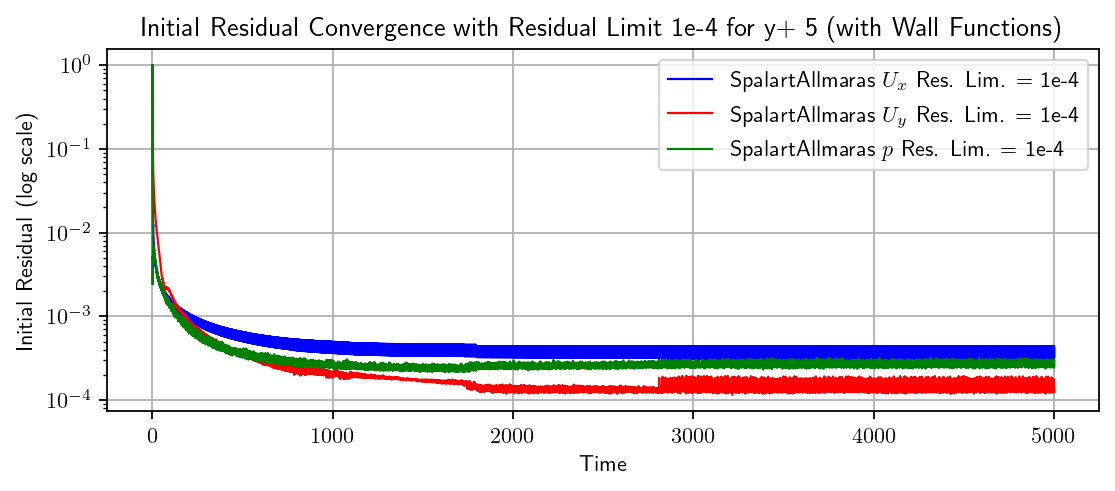

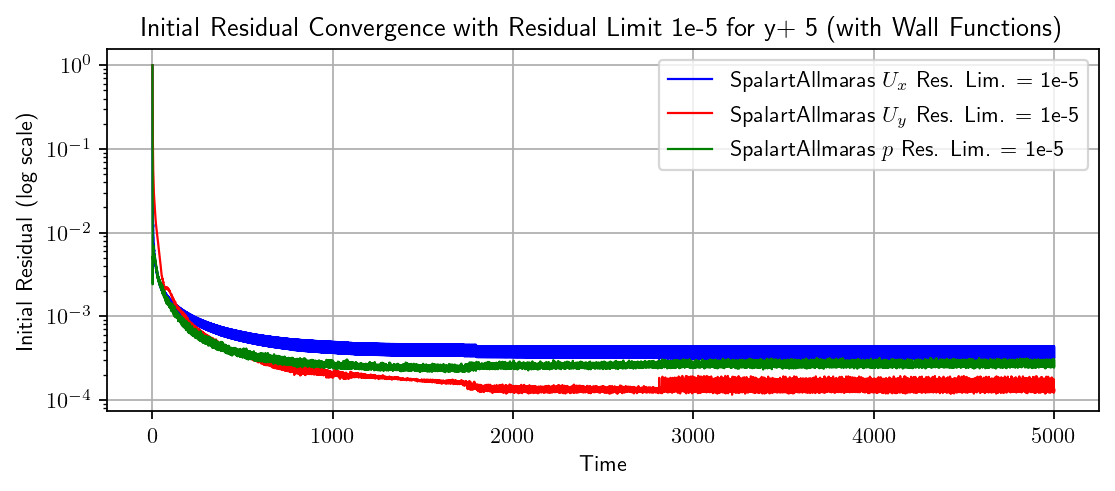

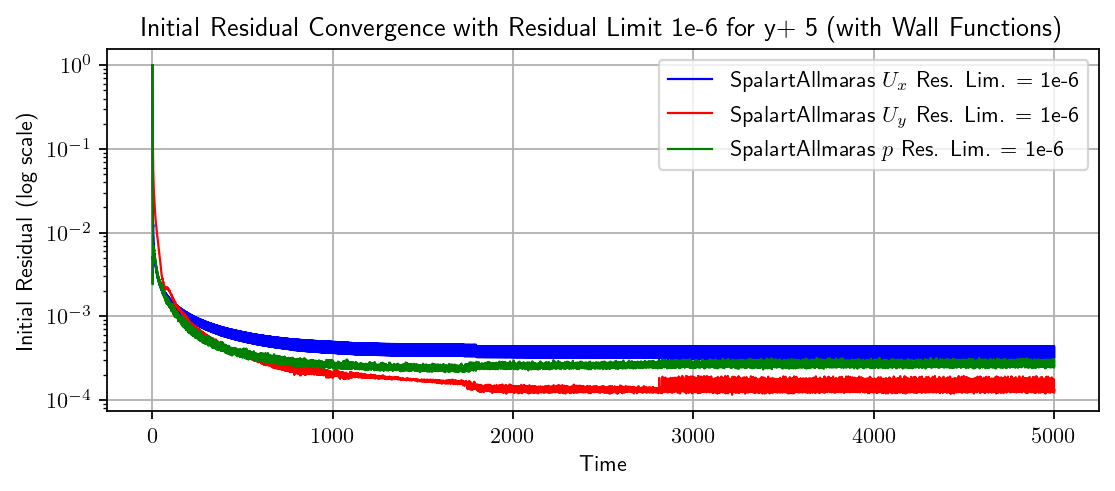

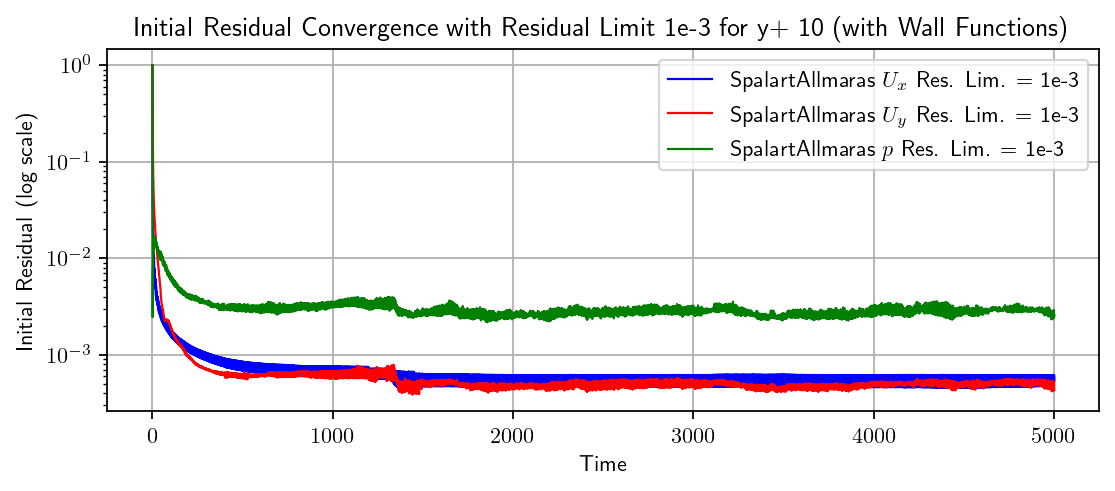

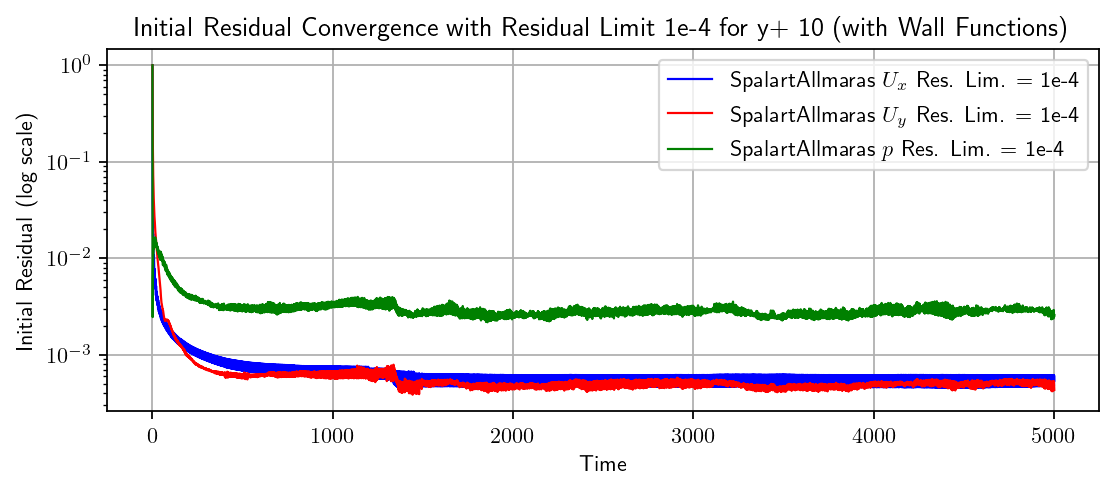

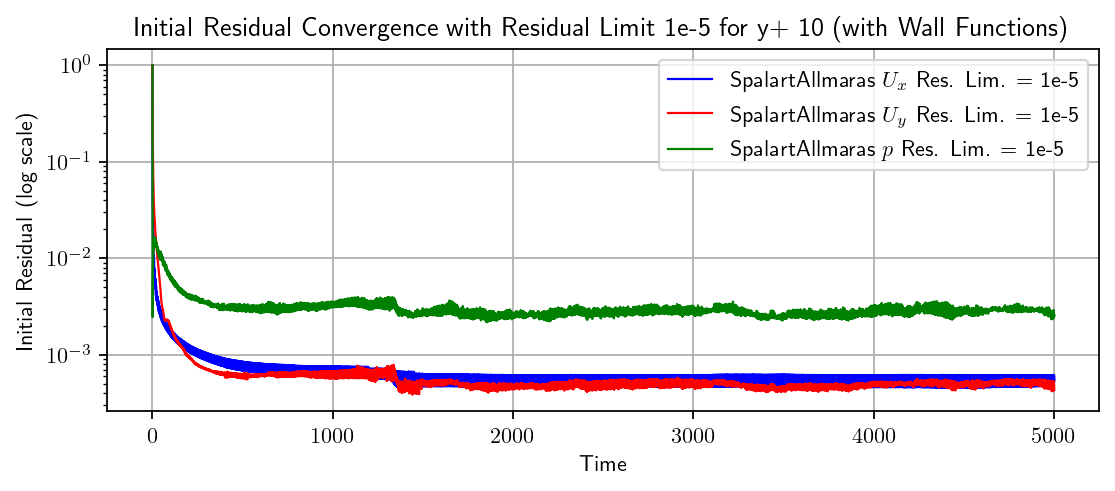

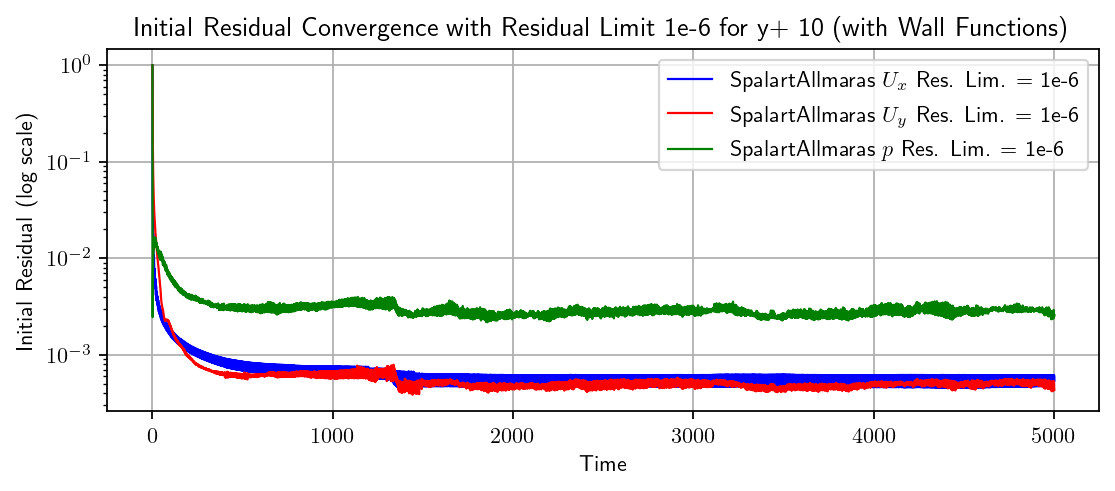

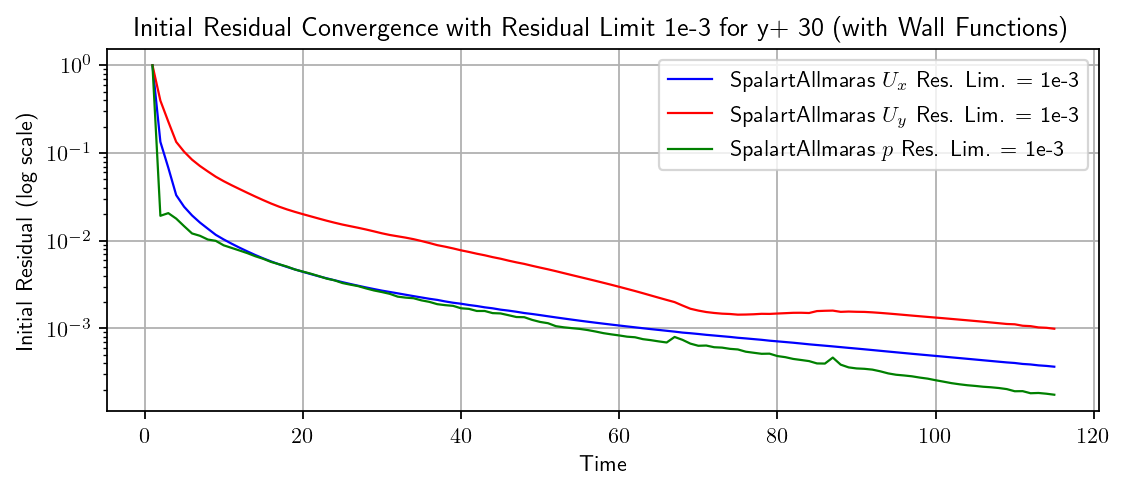

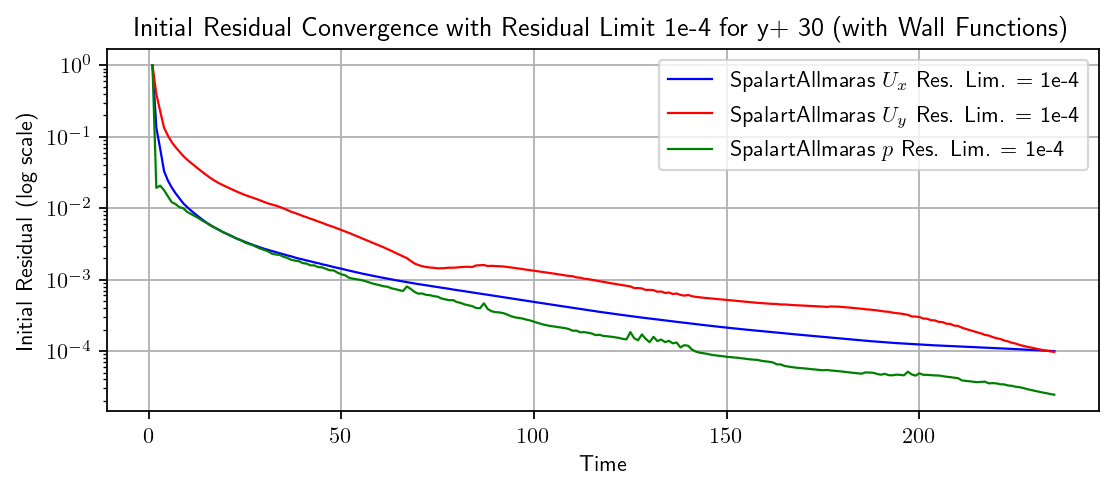

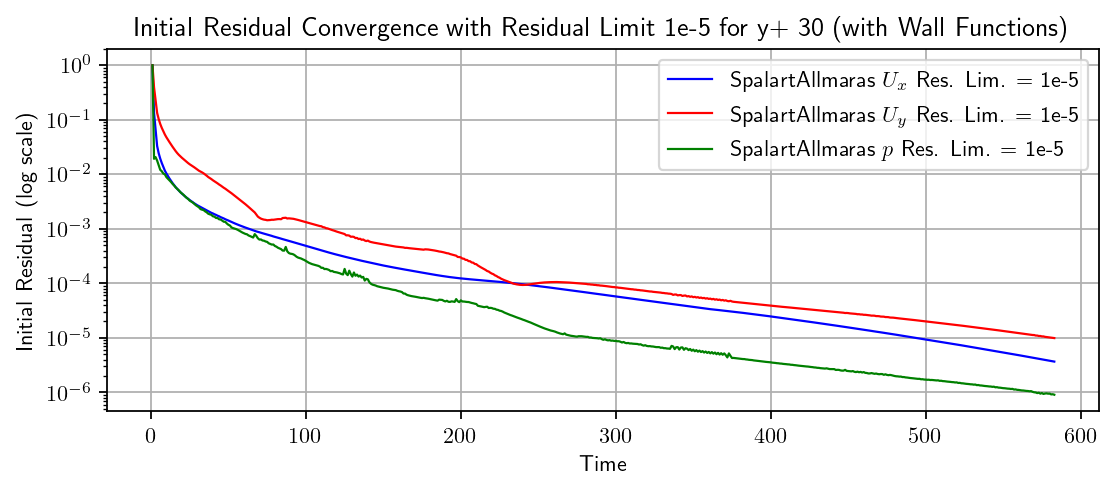

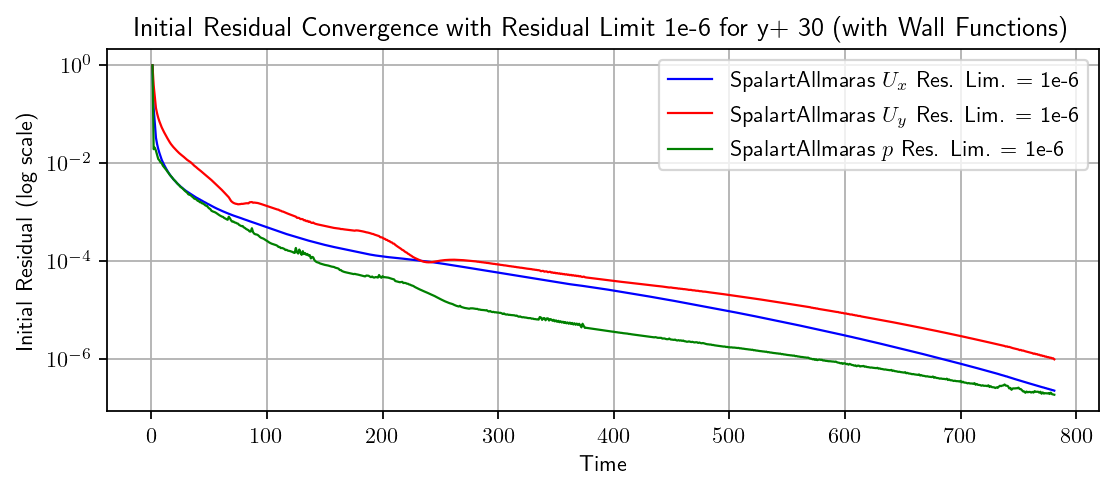

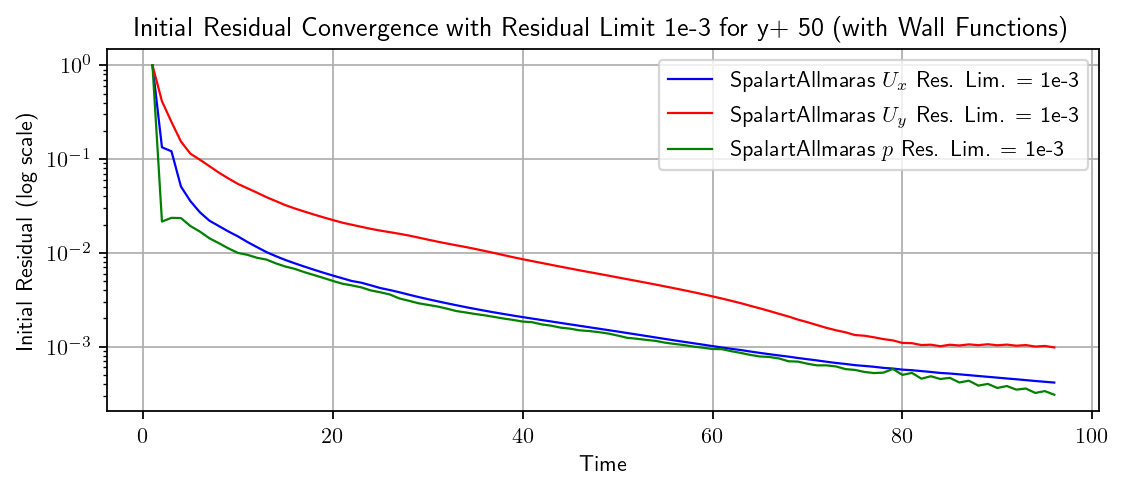

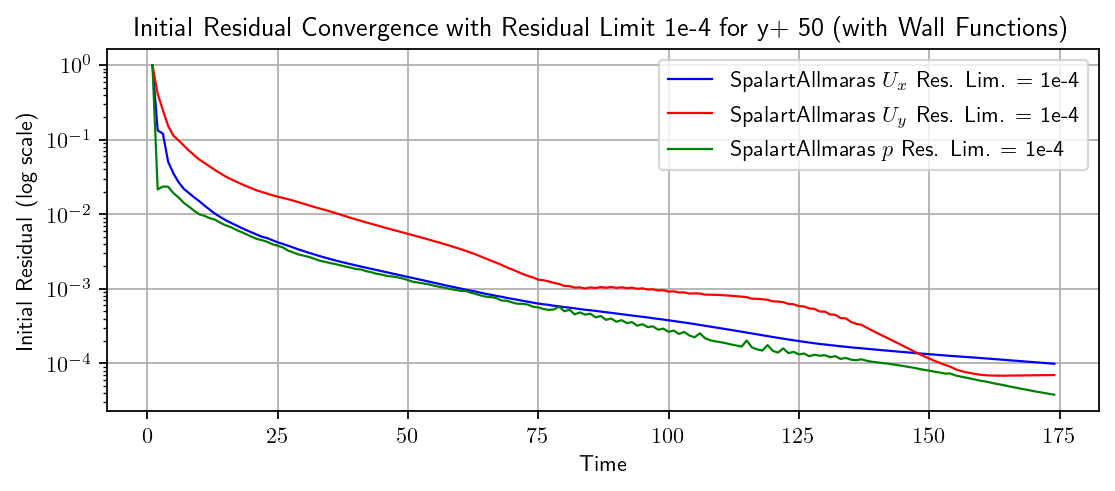

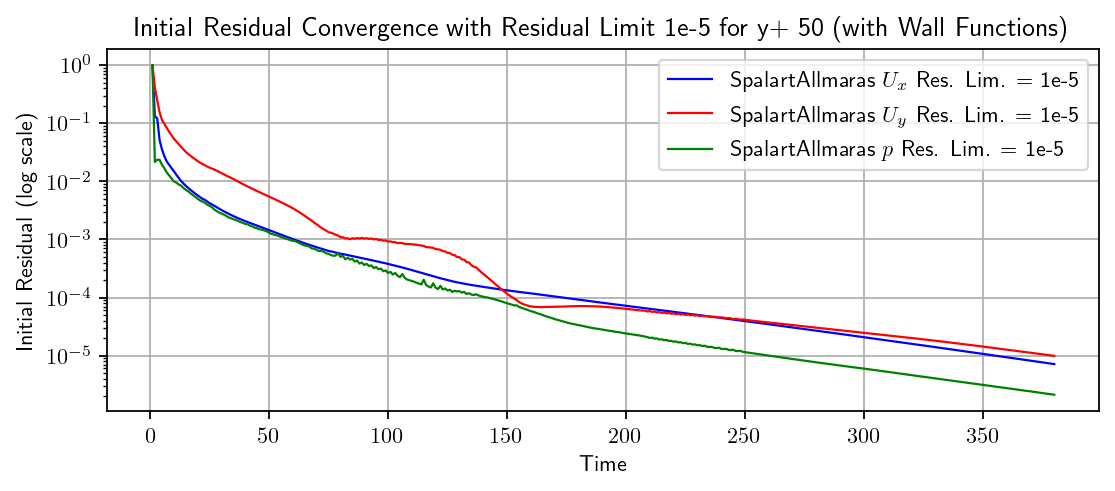

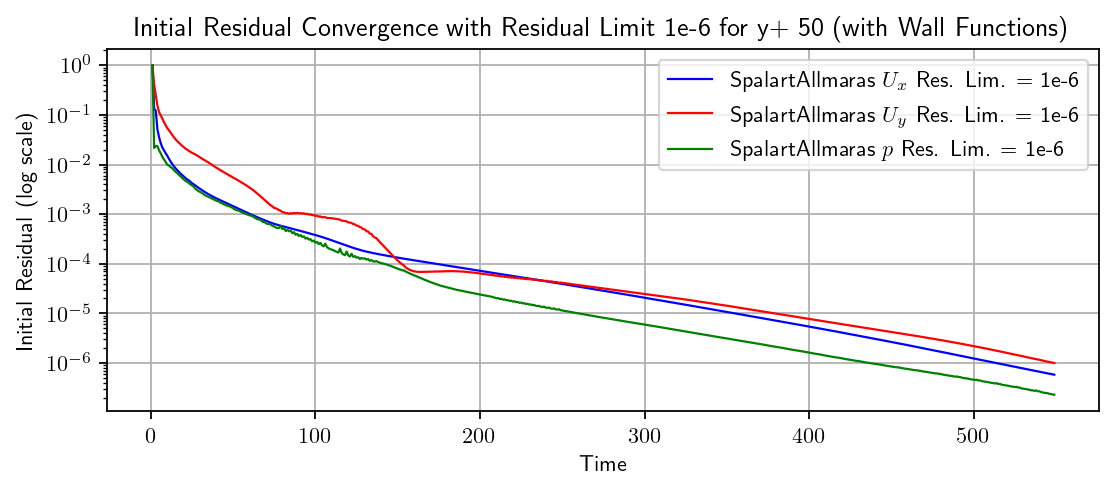

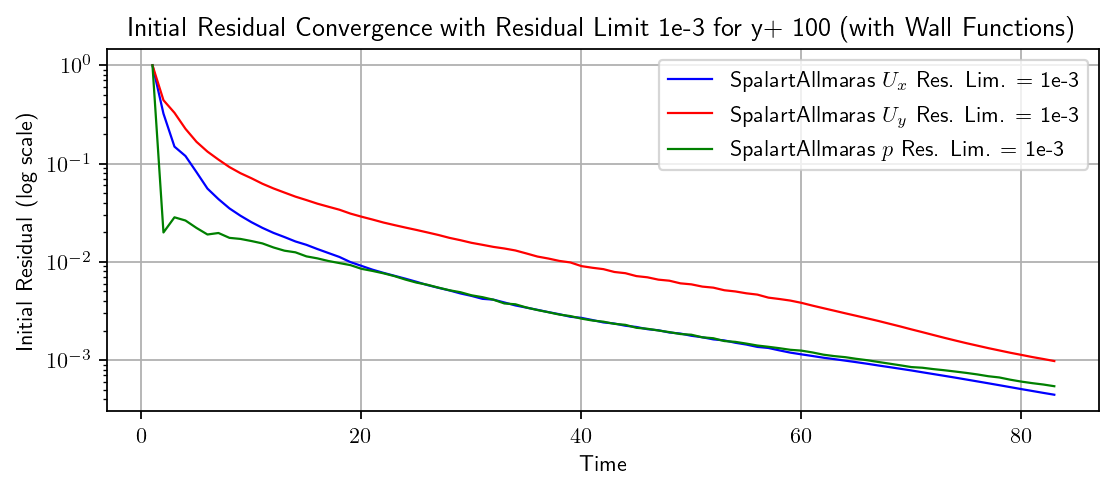

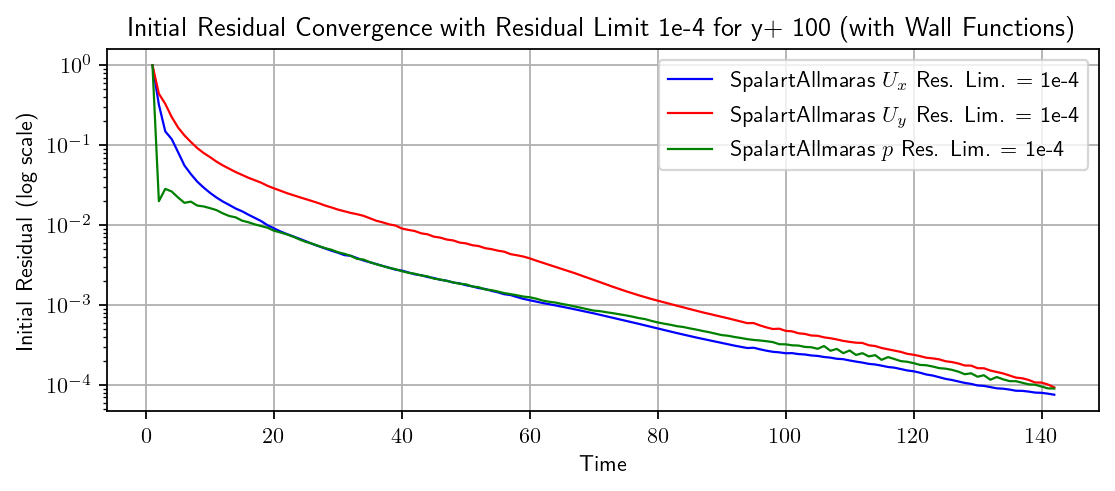

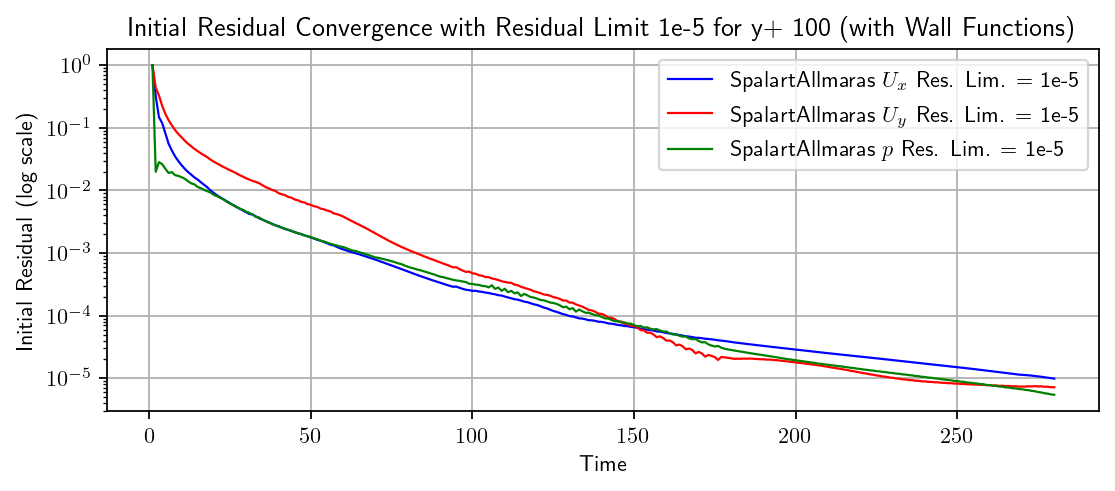

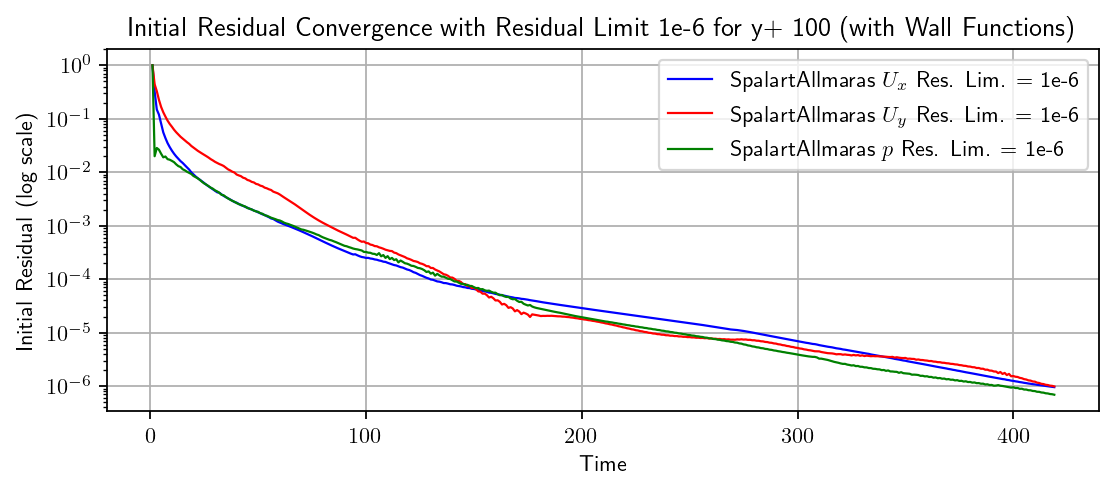

In [7]:
lw = 1.0
for j in range(len(yp)):
    for i in range(len(res_list)):
        fig, ax = plt.subplots(1, 1, figsize=(8, 3))
        plt.yscale("log")
        plt.grid()
        plt.title("Initial Residual Convergence with Residual Limit {} for y+ {} (with Wall Functions)".format(res_list[i], yp[j]))
        ax.set_xlabel("Time")
        ax.set_ylabel("Initial Residual (log scale)")
        ax.plot(t[i + len(res_list)*j], Ux_init_res[i + len(res_list)*j], color = 'b', label = "{} $U_x$ Res. Lim. = {}".format(model, res_list[i]), lw = lw)
        ax.plot(t[i + len(res_list)*j], Uy_init_res[i + len(res_list)*j], color = 'r', label = "{} $U_y$ Res. Lim. = {}".format(model, res_list[i]), lw = lw)
        ax.plot(t[i + len(res_list)*j], p_init_res[i + len(res_list)*j], color = 'g', label = "{} $p$ Res. Lim. = {}".format(model, res_list[i]), lw = lw)
        ax.legend()
        plt.savefig(sa + "solverInfo_{}_yp{}_{}_withWallFunc.pdf".format(model, yp[j], res_list[i]), bbox_inches="tight")

### 4-2. Turbulent Flat Plate Case without Wall Functions

<ipython-input-8-ca9c8b93ad4a>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))


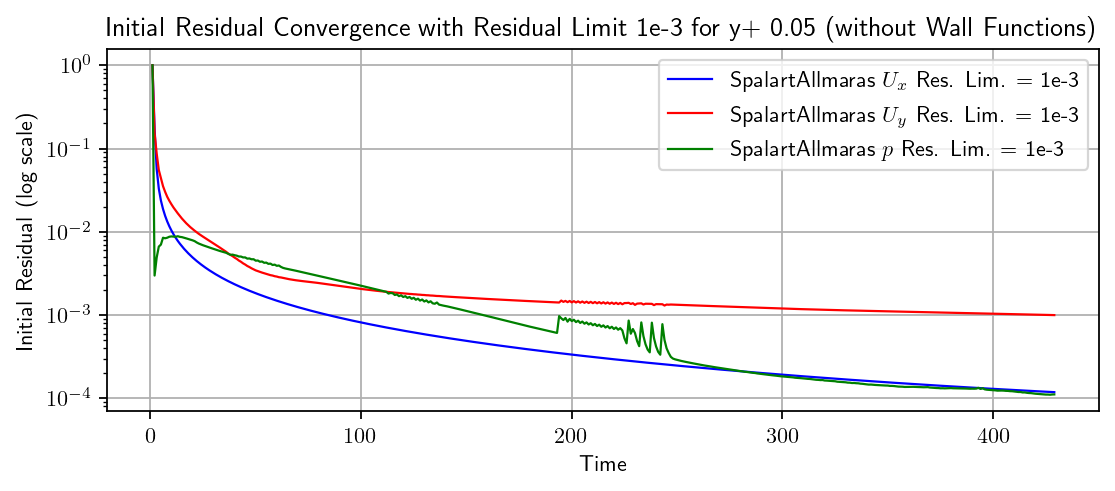

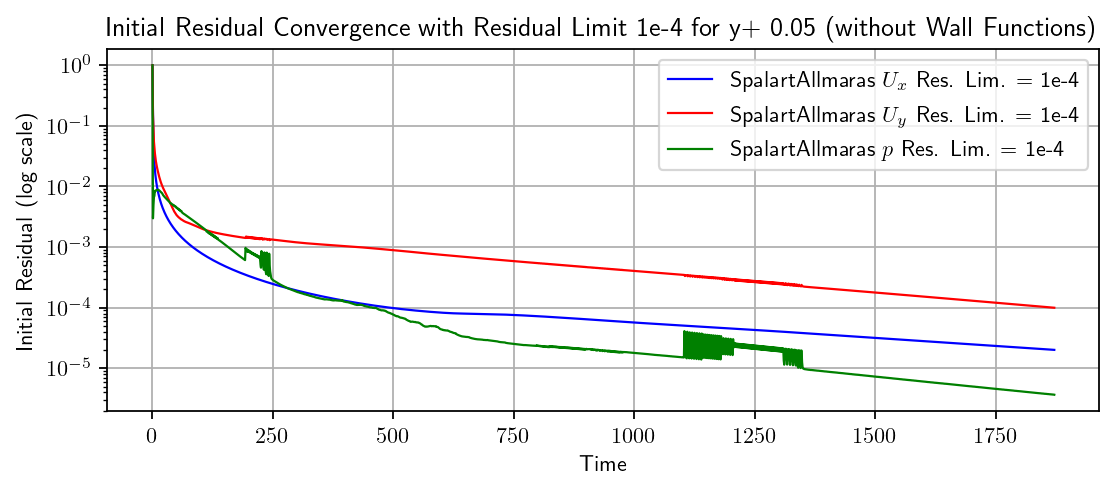

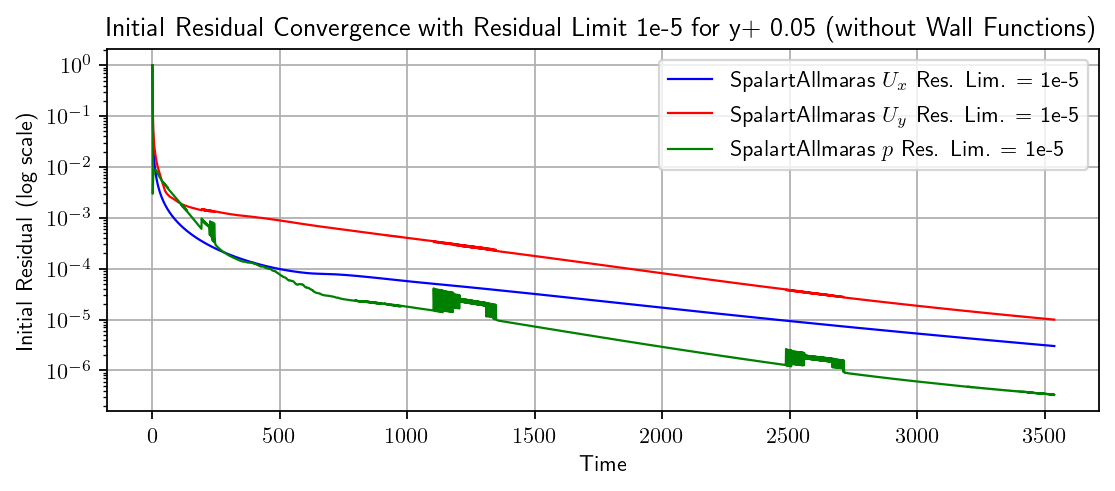

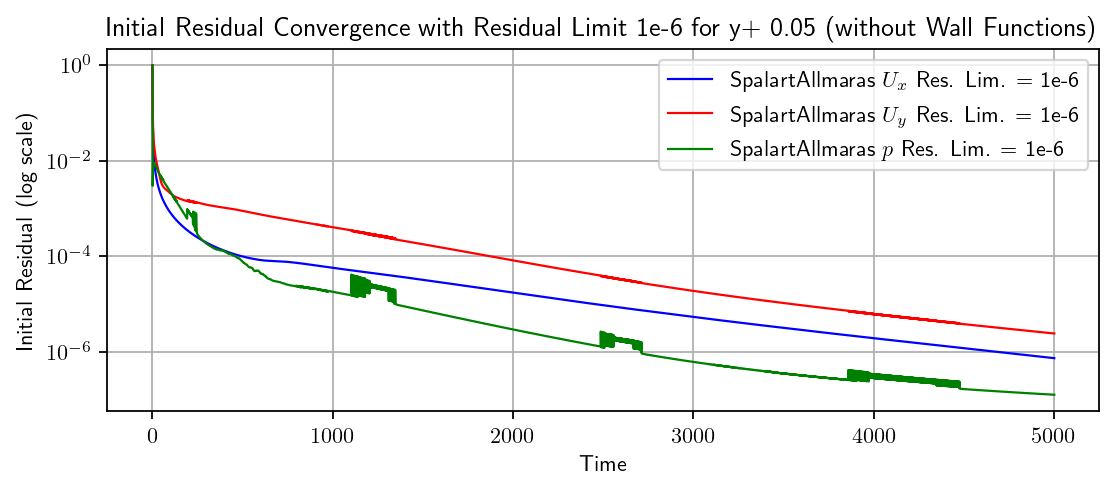

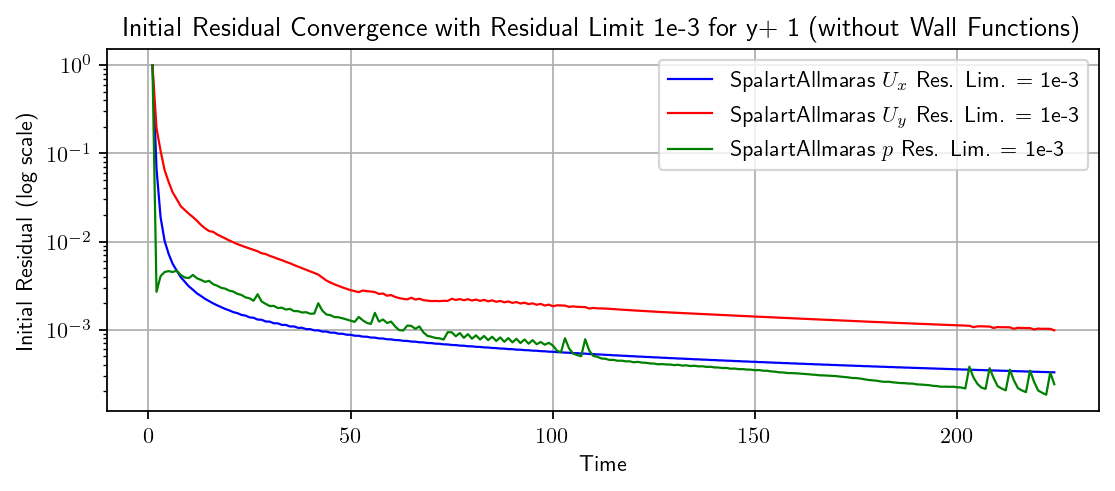

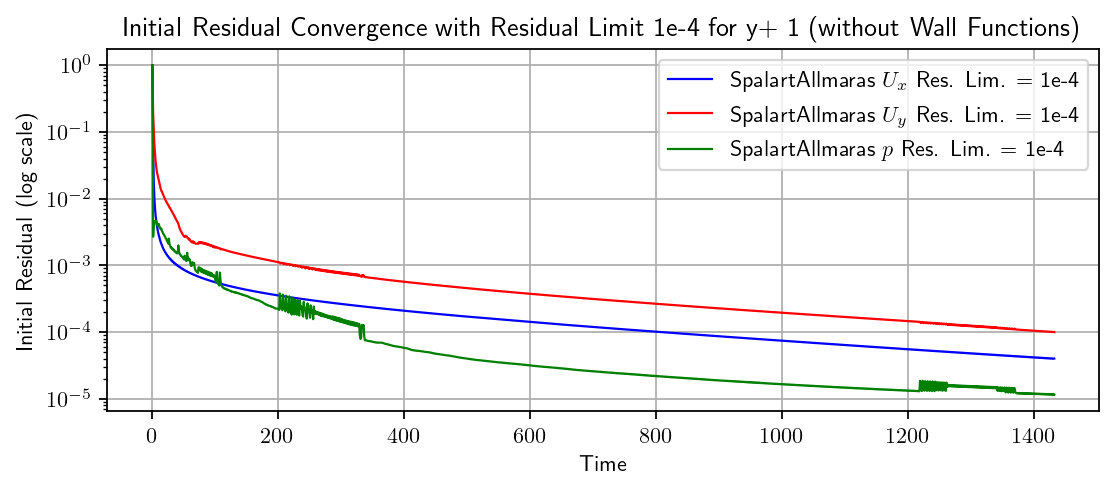

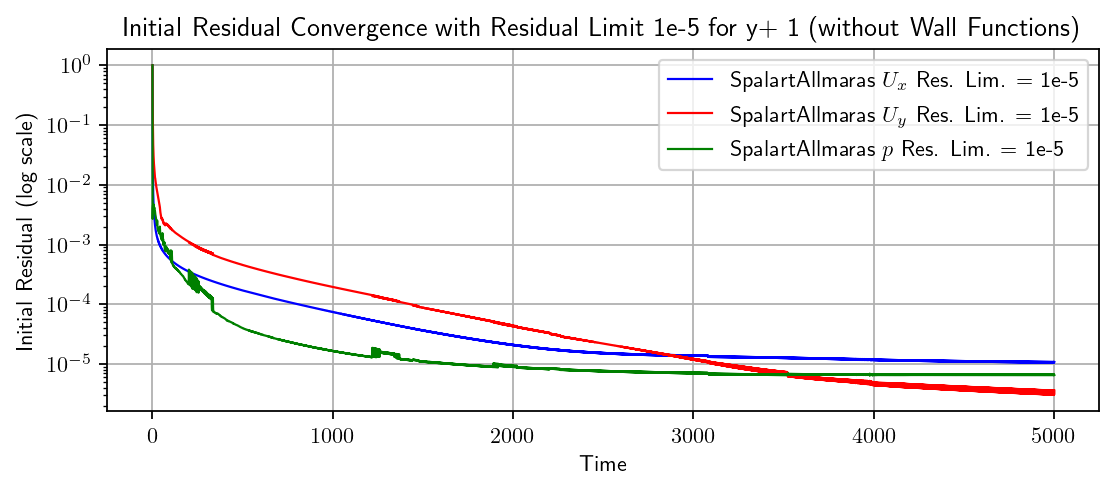

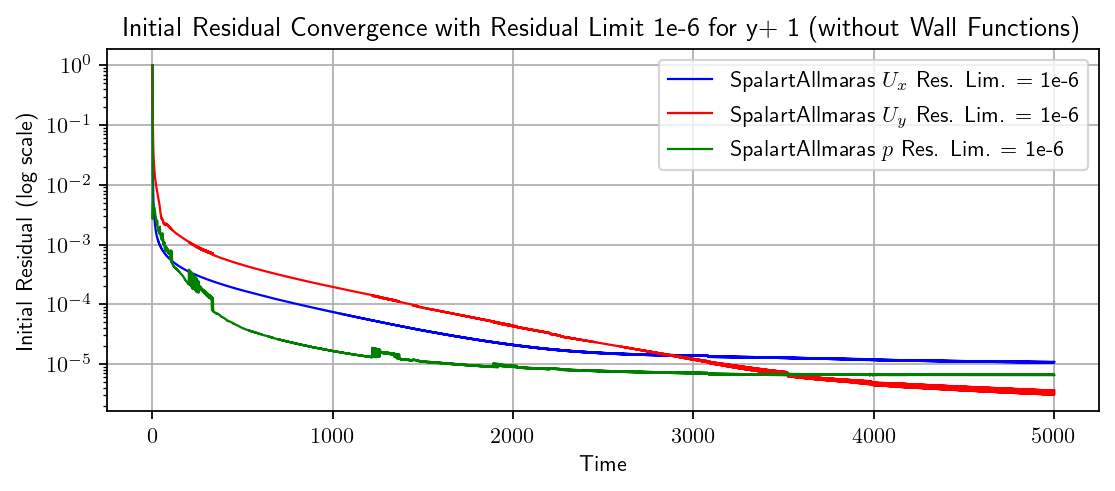

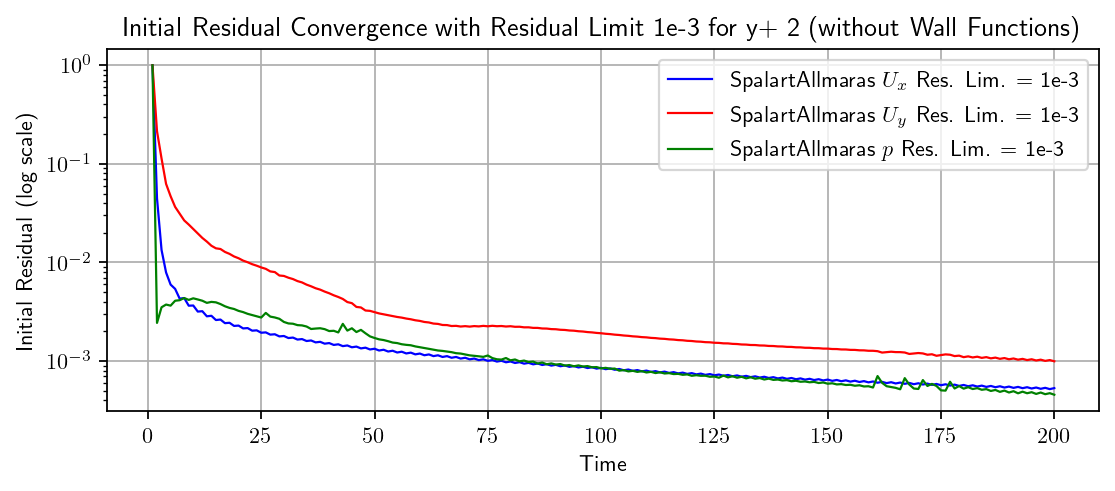

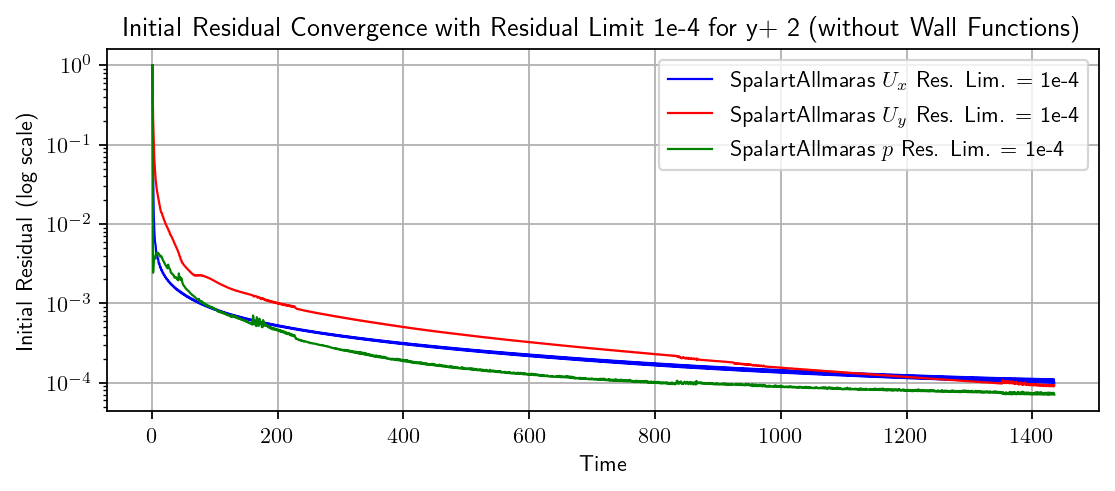

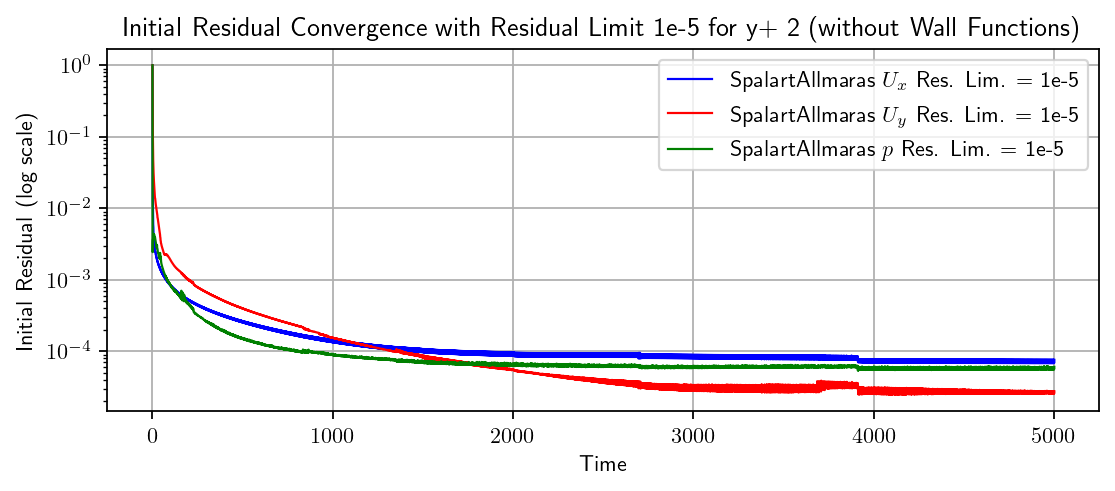

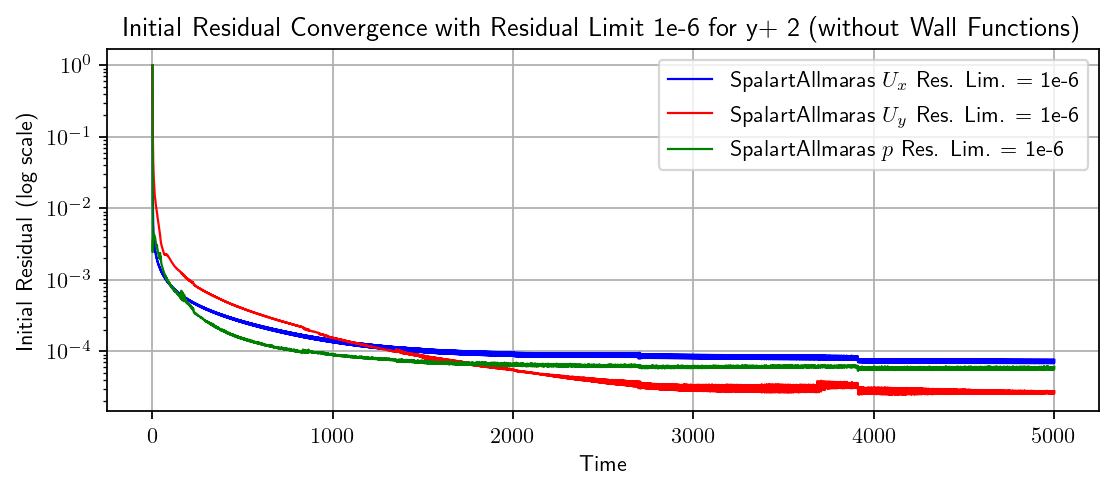

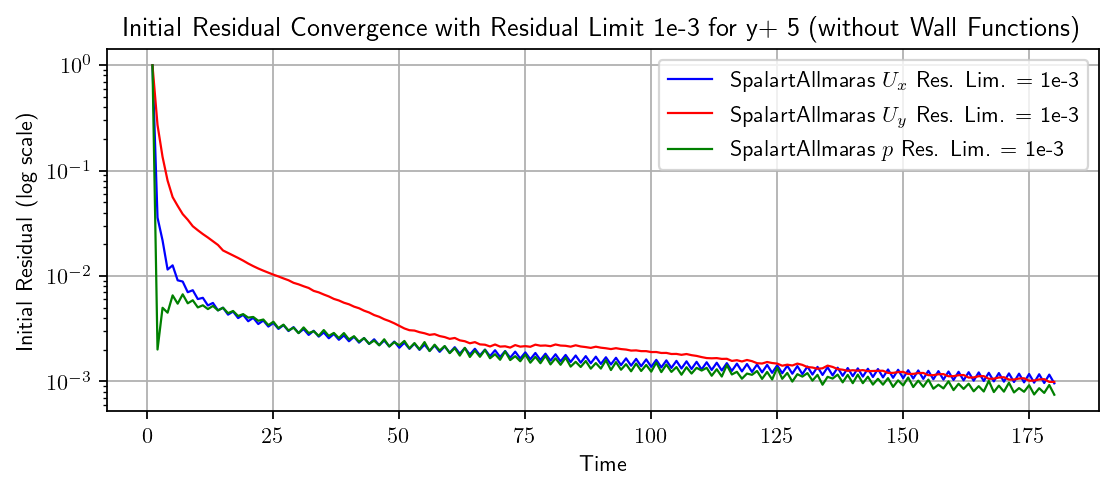

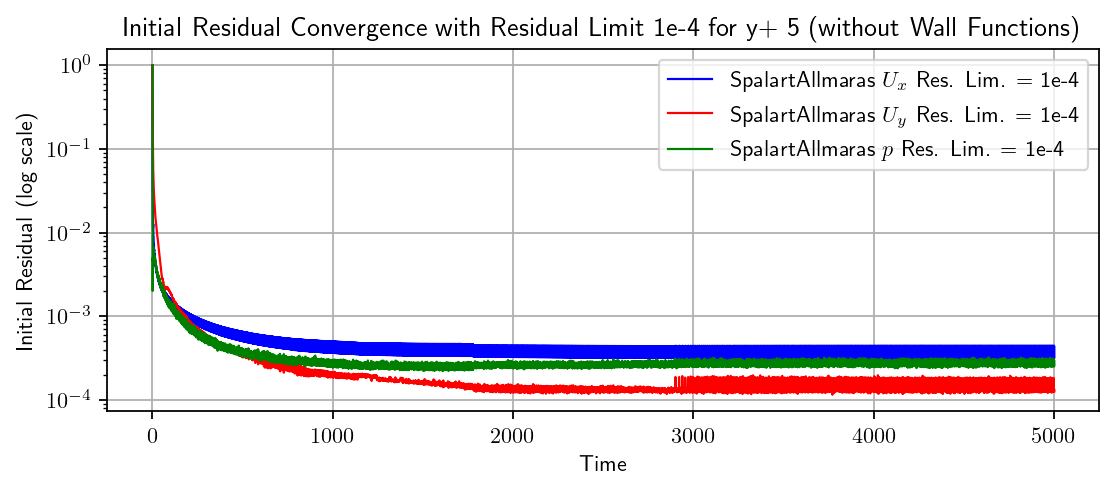

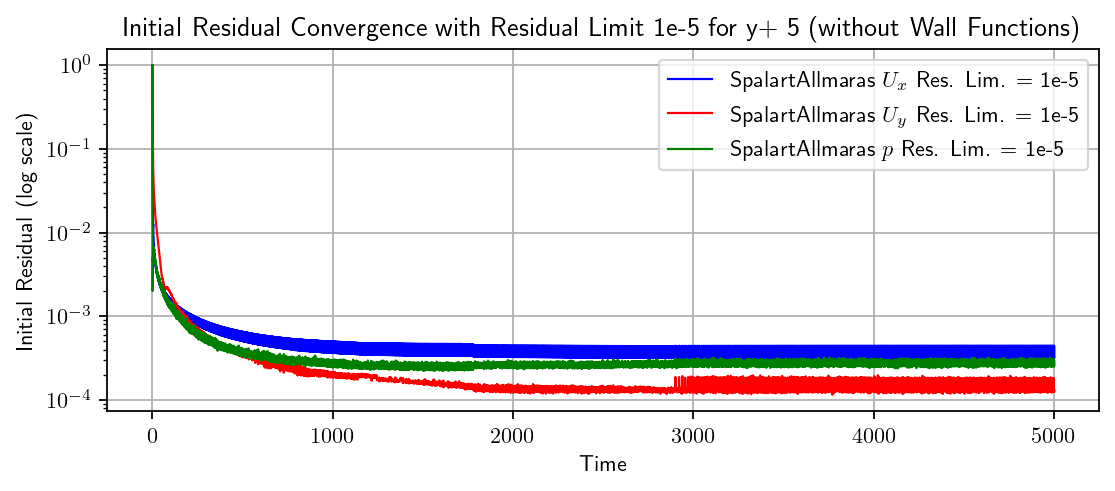

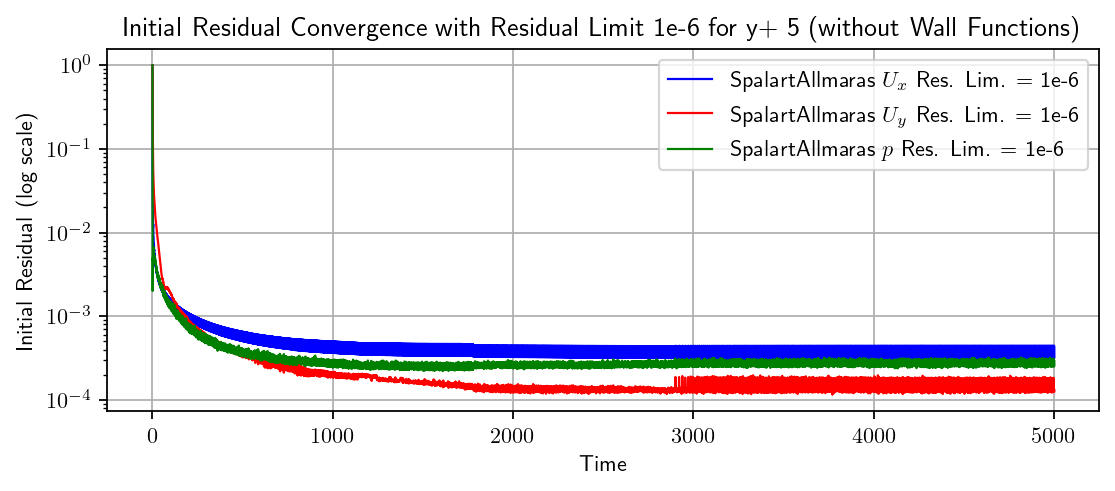

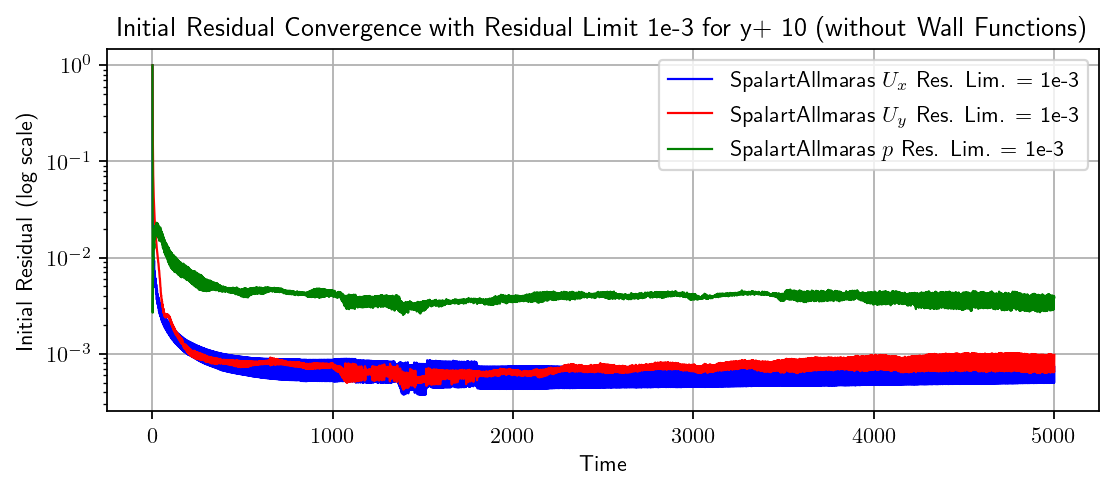

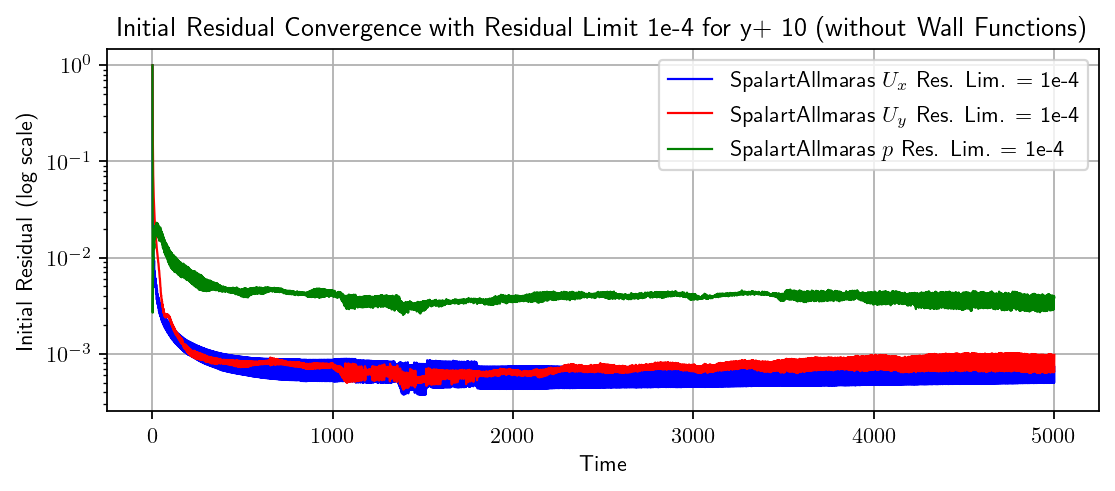

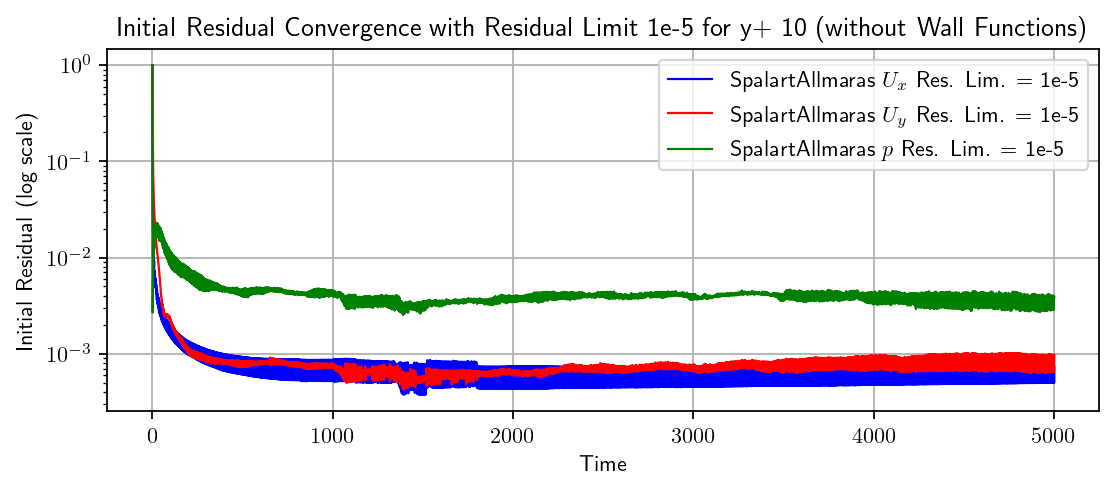

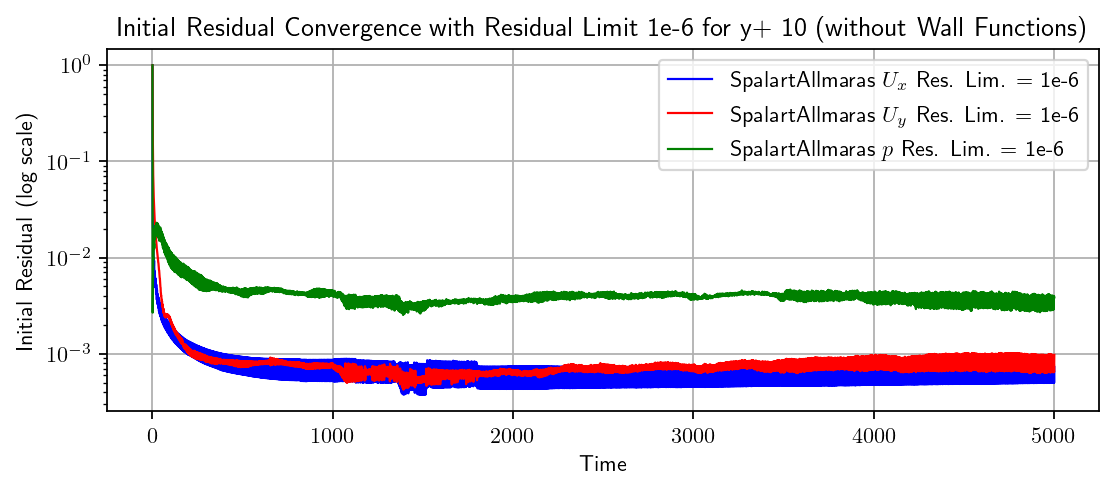

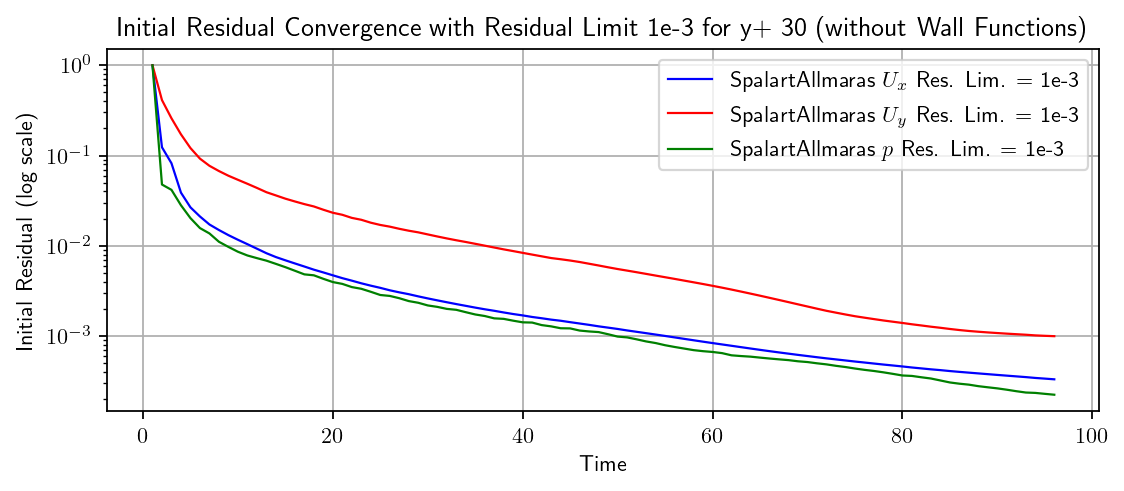

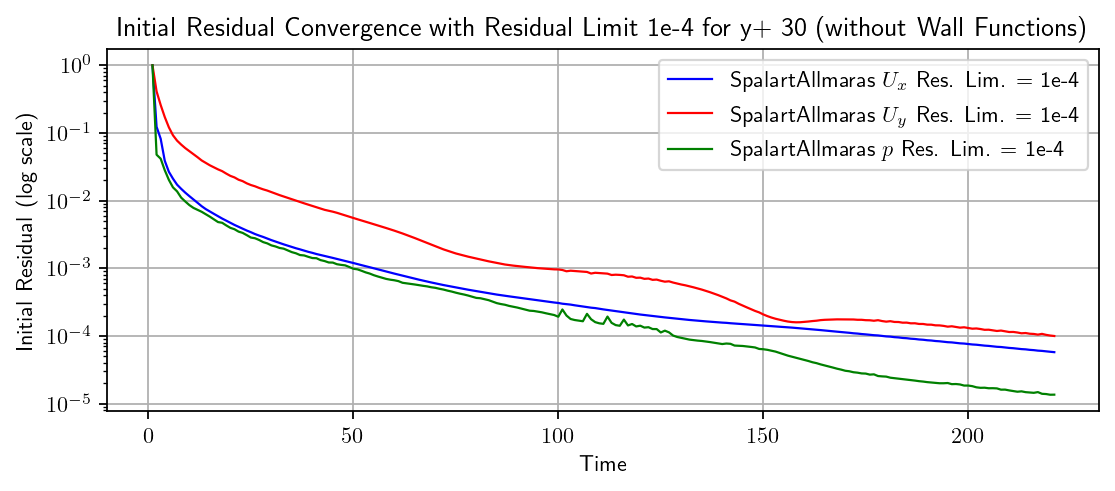

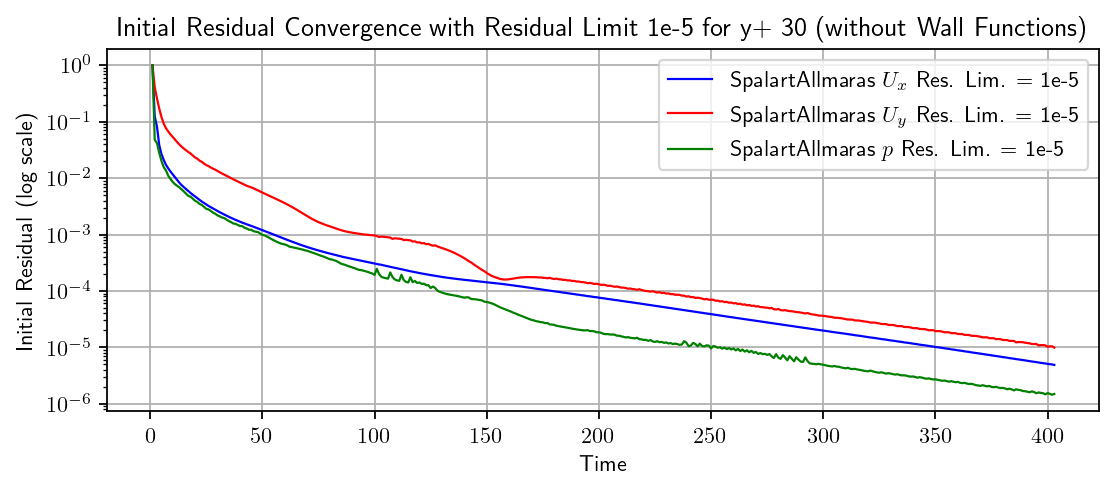

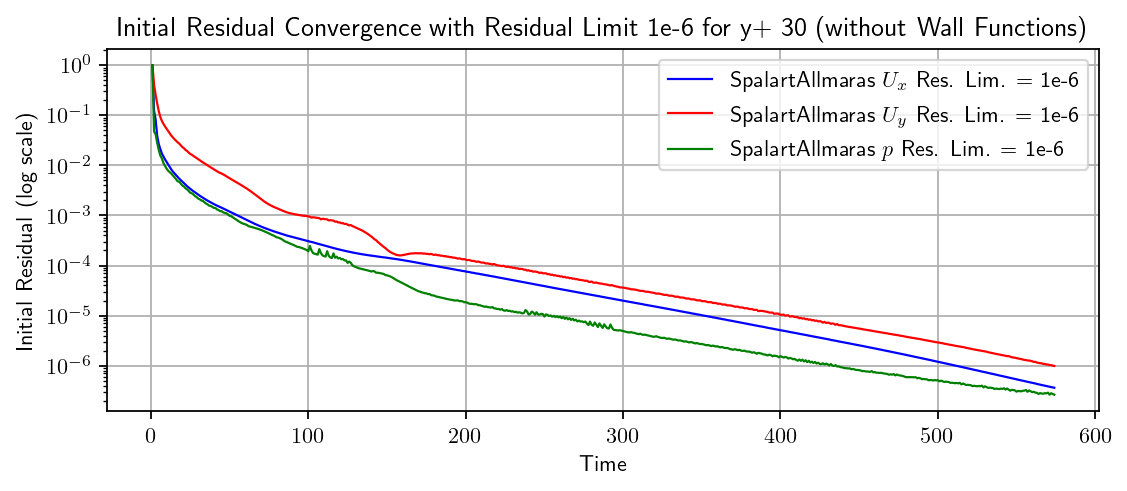

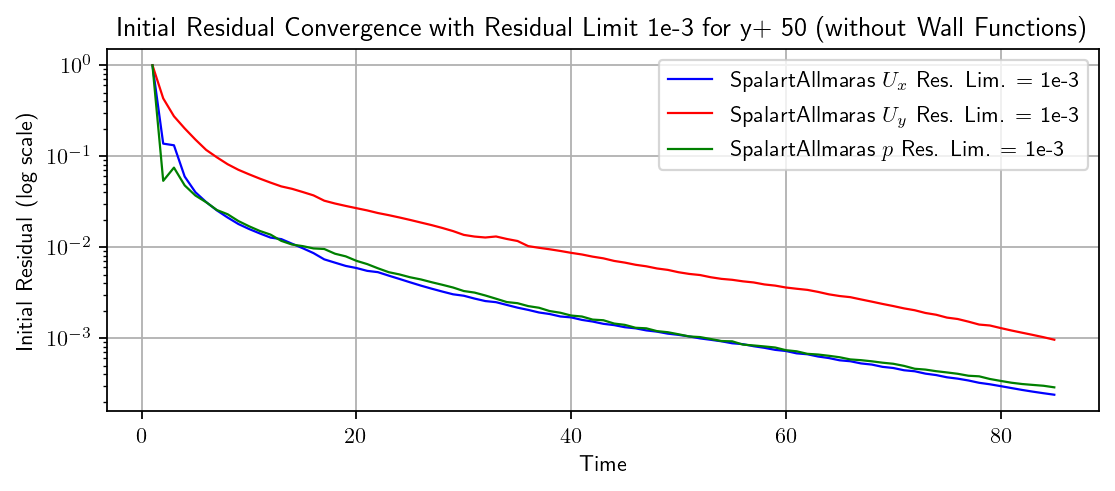

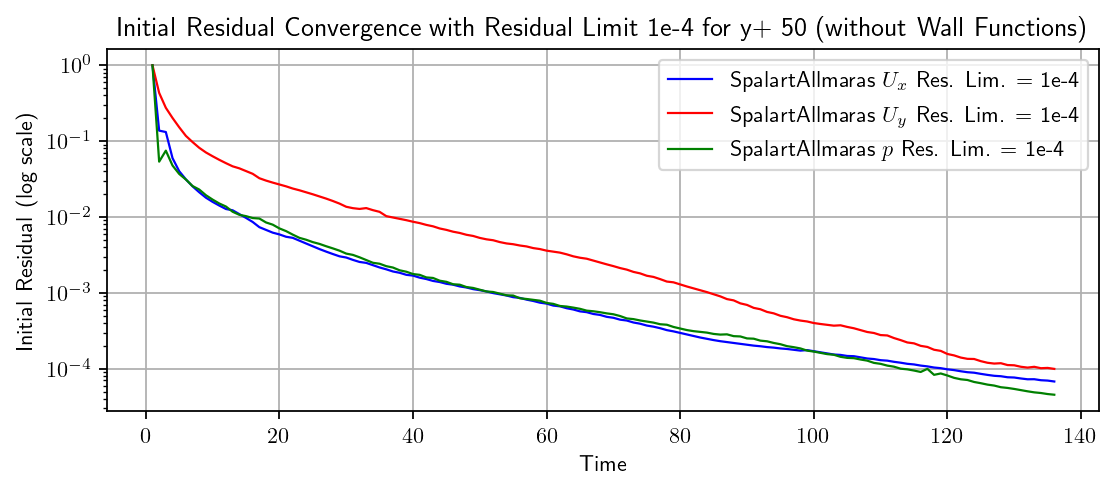

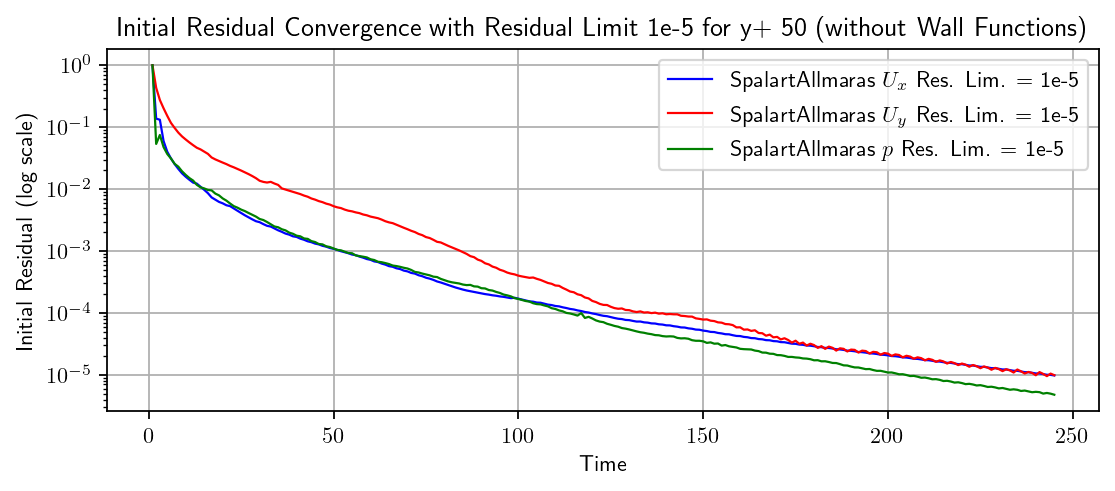

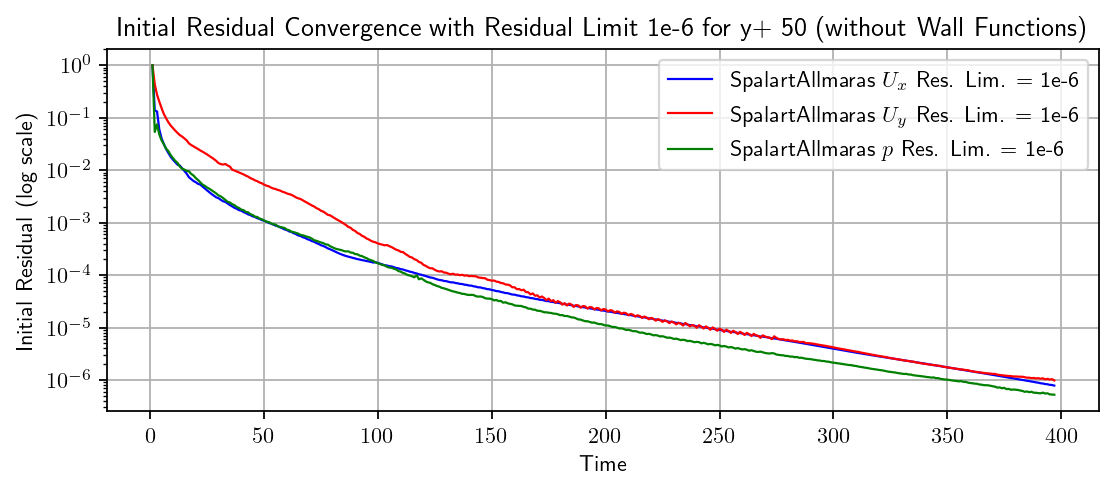

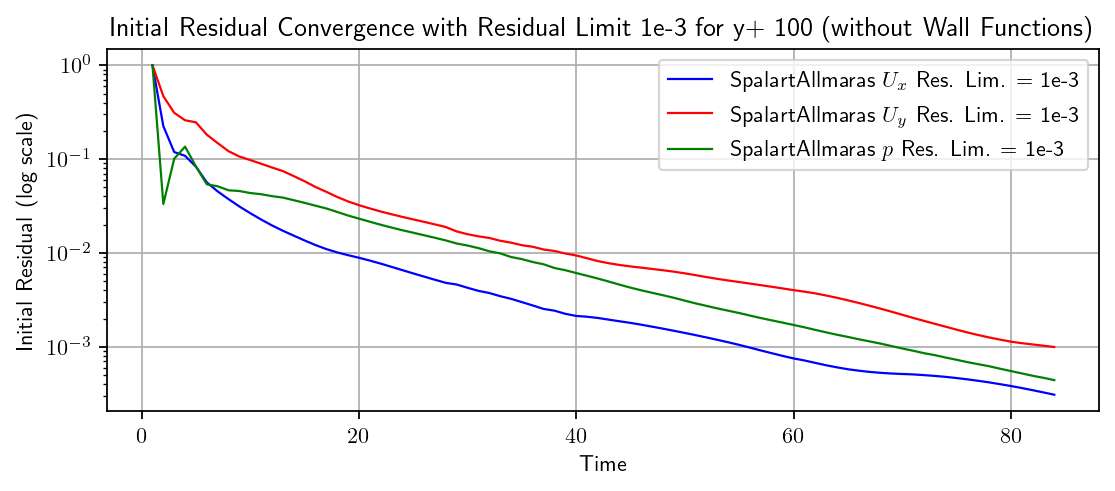

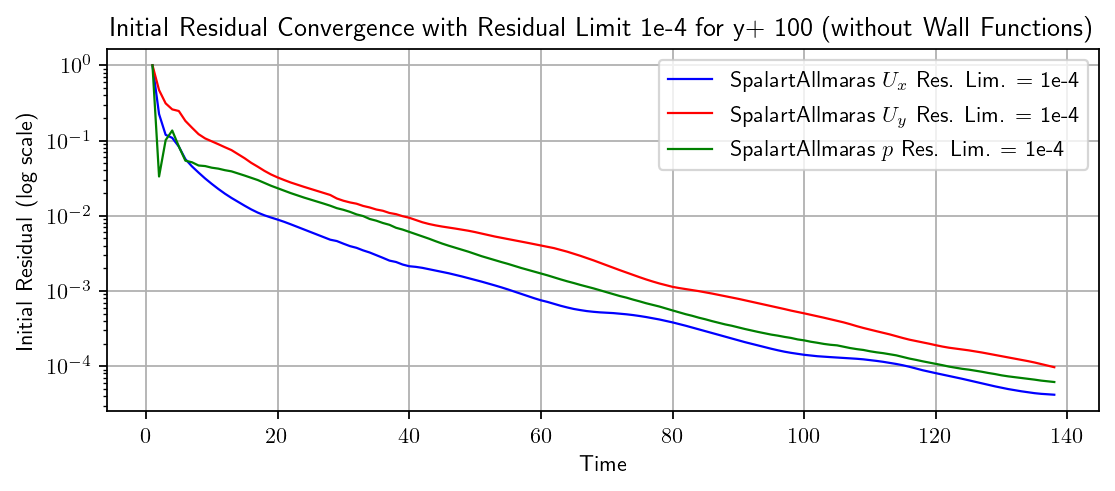

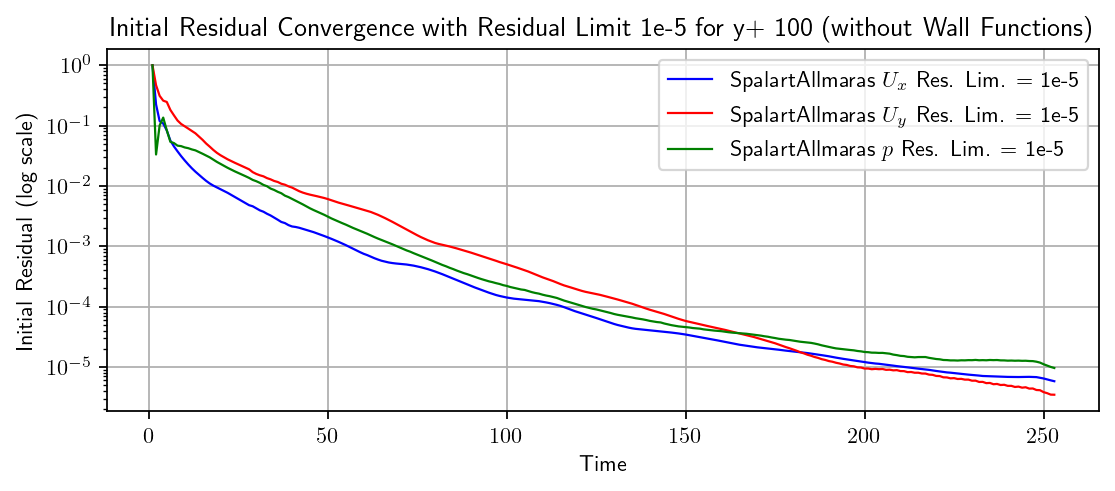

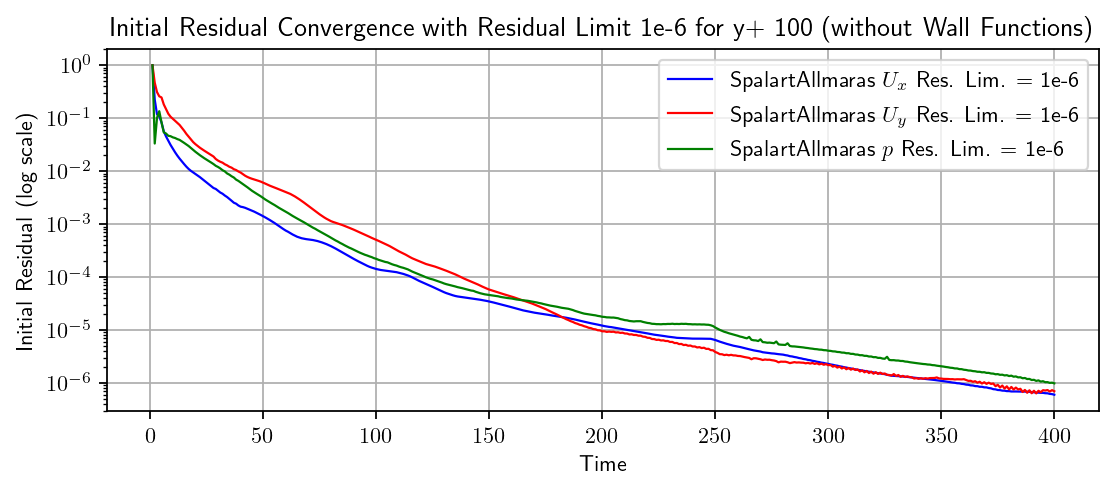

In [8]:
lw2 = 1.0
for j in range(len(yp)):
    for i in range(len(res_list)):
        fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
        plt.yscale("log")
        plt.grid()
        plt.title("Initial Residual Convergence with Residual Limit {} for y+ {} (without Wall Functions)".format(res_list[i], yp[j]))
        ax2.set_xlabel("Time")
        ax2.set_ylabel("Initial Residual (log scale)")
        ax2.plot(t_noWallFunc[i + len(res_list)*j], Ux_init_res_noWallFunc[i + len(res_list)*j], color = 'b', label = "{} $U_x$ Res. Lim. = {}".format(model, res_list[i]), lw = lw2)
        ax2.plot(t_noWallFunc[i + len(res_list)*j], Uy_init_res_noWallFunc[i + len(res_list)*j], color = 'r', label = "{} $U_y$ Res. Lim. = {}".format(model, res_list[i]), lw = lw2)
        ax2.plot(t_noWallFunc[i + len(res_list)*j], p_init_res_noWallFunc[i + len(res_list)*j], color = 'g', label = "{} $p$ Res. Lim. = {}".format(model, res_list[i]), lw = lw2)
        ax2.legend()
        plt.savefig(sa + "solverInfo_{}_yp{}_{}_noWallFunc.pdf".format(model, yp[j], res_list[i]), bbox_inches="tight")